In [2]:
import requests
from bs4 import BeautifulSoup
import re

def scrape_fugu_posts():
    base_url = "https://www.ichiroumaru.jp/result/"
    fugu_links = []
    page = 1
    flag = True
    page_limit = 100
    while flag:
        # ページURLの構築
        if page == 1:
            url = base_url
        else:
            url = f"{base_url}index.html?page={page}"
        # ページの取得
        response = requests.get(url)
        if response.status_code != 200:
            break
            
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # 記事リストアイテムの取得
        items = soup.find_all('div', class_='result__list__item')
        
        if not items:
            break
            
        # フグ関連の記事を抽出
        for item in items:
            link = item.find('div', class_='result__list__item__link__content')
            if link and ('フグ' in link.text or 'ふぐ' in link.text):
                post_url = item.find('a')['href']
                date = item.find('time')['datetime']
                title = link.text.strip()
                fugu_links.append({
                    'date': date,
                    'title': title,
                    'url': f"https://www.ichiroumaru.jp/result/{post_url[2:]}"
                })
        
        page += 1
        if page > page_limit:
            flag=False
    return fugu_links

# 実行
fugu_posts = scrape_fugu_posts()
for post in fugu_posts:
    print(f"日付: {post['date']}, タイトル: {post['title']}")
    print(f"URL: {post['url']}")
    print("-" * 50)

日付: 2024-12-08, タイトル: ふぐ釣り
URL: https://www.ichiroumaru.jp/result/detail.html?1733638622
--------------------------------------------------
日付: 2024-12-07, タイトル: ふぐ釣り
URL: https://www.ichiroumaru.jp/result/detail.html?1733553358
--------------------------------------------------
日付: 2024-12-06, タイトル: ふぐ釣り
URL: https://www.ichiroumaru.jp/result/detail.html?1733462402
--------------------------------------------------
日付: 2024-12-05, タイトル: ふぐ釣り好調です！！
URL: https://www.ichiroumaru.jp/result/detail.html?1733381353
--------------------------------------------------
日付: 2024-12-04, タイトル: ふぐ釣り好調です！！
URL: https://www.ichiroumaru.jp/result/detail.html?1733294346
--------------------------------------------------
日付: 2024-12-03, タイトル: ふぐ釣り好調です！！
URL: https://www.ichiroumaru.jp/result/detail.html?1733207790
--------------------------------------------------
日付: 2024-12-02, タイトル: ふぐ釣り好調です！！
URL: https://www.ichiroumaru.jp/result/detail.html?1733121264
-----------------------------------------------

In [3]:
import requests
from bs4 import BeautifulSoup
import re

def scrape_fugu_posts():
    # 前回のコードと同じ内容
    # 省略
    pass

def extract_catch_number(url):
    response = requests.get(url)
    if response.status_code != 200:
        return None
        
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # result-detail__list__item__main__numberクラスから釣果を取得
    catch_element = soup.find('div', class_='result-detail__list__item__main__number')
    if catch_element:
        # 全角数字を含む文字列から数字部分を抽出
        catch_text = catch_element.text.strip()
        # 全角数字を半角に変換して数値として取得
        number = re.search(r'([０-９]+)匹', catch_text)
        if number:
            # 全角数字を半角に変換
            zen_num = number.group(1)
            han_num = int(zen_num.translate(str.maketrans('０１２３４５６７８９', '0123456789')))
            return han_num
    return None

def analyze_fugu_catches(posts):
    catch_data = []
    
    for post in posts:
        catch_number = extract_catch_number(post['url'])
        if catch_number is not None:
            catch_data.append({
                'date': post['date'],
                'title': post['title'],
                'catch': catch_number
            })
            print(f"日付: {post['date']}, タイトル: {post['title']}, 釣果: {catch_number}匹")
    
    return catch_data

# 実行
catch_results = analyze_fugu_catches(fugu_posts)

日付: 2024-12-08, タイトル: ふぐ釣り, 釣果: 13匹
日付: 2024-12-07, タイトル: ふぐ釣り, 釣果: 18匹
日付: 2024-12-06, タイトル: ふぐ釣り, 釣果: 8匹
日付: 2024-12-05, タイトル: ふぐ釣り好調です！！, 釣果: 25匹
日付: 2024-12-04, タイトル: ふぐ釣り好調です！！, 釣果: 24匹
日付: 2024-12-03, タイトル: ふぐ釣り好調です！！, 釣果: 32匹
日付: 2024-12-02, タイトル: ふぐ釣り好調です！！, 釣果: 30匹
日付: 2024-12-01, タイトル: ふぐ釣り好調です！！, 釣果: 30匹
日付: 2024-11-30, タイトル: ふぐ釣り好調です！！, 釣果: 48匹
日付: 2024-11-26, タイトル: ふぐ釣り好調です！！, 釣果: 18匹
日付: 2024-11-25, タイトル: ふぐ釣り好調です！！, 釣果: 23匹
日付: 2024-11-24, タイトル: ふぐ釣り好調です！！, 釣果: 24匹
日付: 2024-11-23, タイトル: ふぐ釣り好調です！！, 釣果: 22匹
日付: 2024-11-19, タイトル: ふぐ釣り, 釣果: 12匹
日付: 2024-11-18, タイトル: ふぐ釣り好調です！！, 釣果: 18匹
日付: 2024-11-17, タイトル: ふぐ釣り好調です！！, 釣果: 19匹
日付: 2024-11-16, タイトル: ふぐ釣り, 釣果: 13匹
日付: 2024-11-15, タイトル: ふぐ釣り好調です！！, 釣果: 22匹
日付: 2024-11-14, タイトル: ふぐ釣り, 釣果: 22匹
日付: 2024-11-13, タイトル: ふぐ釣り, 釣果: 15匹
日付: 2024-11-12, タイトル: ふぐ釣り好調です！！, 釣果: 24匹
日付: 2024-11-10, タイトル: ふぐ釣り好調です！！, 釣果: 17匹
日付: 2024-11-09, タイトル: ふぐ釣り, 釣果: 13匹
日付: 2024-11-07, タイトル: ふぐ釣り好調です！！, 釣果: 24匹
日付: 2024-11-06, タイトル: ふぐ釣り好調です！！, 釣果: 21匹

In [4]:
catch_results

[{'date': '2024-12-08', 'title': 'ふぐ釣り', 'catch': 13},
 {'date': '2024-12-07', 'title': 'ふぐ釣り', 'catch': 18},
 {'date': '2024-12-06', 'title': 'ふぐ釣り', 'catch': 8},
 {'date': '2024-12-05', 'title': 'ふぐ釣り好調です！！', 'catch': 25},
 {'date': '2024-12-04', 'title': 'ふぐ釣り好調です！！', 'catch': 24},
 {'date': '2024-12-03', 'title': 'ふぐ釣り好調です！！', 'catch': 32},
 {'date': '2024-12-02', 'title': 'ふぐ釣り好調です！！', 'catch': 30},
 {'date': '2024-12-01', 'title': 'ふぐ釣り好調です！！', 'catch': 30},
 {'date': '2024-11-30', 'title': 'ふぐ釣り好調です！！', 'catch': 48},
 {'date': '2024-11-26', 'title': 'ふぐ釣り好調です！！', 'catch': 18},
 {'date': '2024-11-25', 'title': 'ふぐ釣り好調です！！', 'catch': 23},
 {'date': '2024-11-24', 'title': 'ふぐ釣り好調です！！', 'catch': 24},
 {'date': '2024-11-23', 'title': 'ふぐ釣り好調です！！', 'catch': 22},
 {'date': '2024-11-19', 'title': 'ふぐ釣り', 'catch': 12},
 {'date': '2024-11-18', 'title': 'ふぐ釣り好調です！！', 'catch': 18},
 {'date': '2024-11-17', 'title': 'ふぐ釣り好調です！！', 'catch': 19},
 {'date': '2024-11-16', 'title': 'ふぐ釣り', 'catch':

In [5]:
# class FishingDataCollector:
#     def __init__(self):
#         self.prefecture_code = "14"  # 神奈川県
#         self.harbor_code = "101"     # 横浜
#         self.weather_station = "46106"  # 横浜のアメダス観測所番号
        
#     def get_tide_data(self, date):
#         base_url = "https://api.tide736.net/get_tide.php"
#         params = {
#             "pc": self.prefecture_code,
#             "hc": self.harbor_code,
#             "yr": date.year,
#             "mn": date.month,
#             "dy": date.day,
#             "rg": "day"
#         }
        
#         print(f"\n潮汐データ取得開始: {date}")
#         print(f"リクエストURL: {base_url}")
#         print(f"パラメータ: {params}")
        
#         response = requests.get(base_url, params=params)
#         print(f"ステータスコード: {response.status_code}")
        
#         if response.status_code == 200:
#             tide_data = response.json()
#             print(f"APIレスポンス: {tide_data}")
            
#             if tide_data['status'] == 1:
#                 date_str = date.strftime('%Y-%m-%d')
#                 chart_data = tide_data['tide']['chart'][date_str]
#                 print(f"チャートデータ: {chart_data}")
                
#                 # 潮位データの処理
#                 tide_levels = []
#                 for tide in chart_data['tide']:
#                     if isinstance(tide['cm'], (int, float)) and tide['cm'] != 0:
#                         tide_levels.append(float(tide['cm']))
                
#                 return {
#                     'tide_type': chart_data['moon']['title'],
#                     'max_tide_level': max(tide_levels) if tide_levels else None,
#                     'min_tide_level': min(tide_levels) if tide_levels else None,
#                     'moon_age': float(chart_data['moon']['age']),
#                     'moon_brightness': float(chart_data['moon']['brightness']),
#                     'sun_rise': chart_data['sun']['rise'],
#                     'sun_set': chart_data['sun']['set']
#                 }
#         return None

#     def get_weather_data(self, date):
#         # 横浜の観測所番号
#         station_id = "47670"
#         base_url = "https://api.cultivationdata.net/past"

#         params = {
#             'no': station_id,
#             'year': date.year,
#             'month': date.month
#         }

#         try:
#             response = requests.get(base_url, params=params)
#             if response.status_code == 200:
#                 weather_data = response.json()

#                 # 日付文字列を作成（例: "2024-12-7"）
#                 date_str = f"{date.year}-{date.month}-{date.day}"

#                 # 横浜のデータを取得
#                 yokohama_data = weather_data.get("横浜（神奈川県)").get(date_str)

#                 if yokohama_data:
#                     return {
#                         'temp_avg': float(yokohama_data['平均気温']) if yokohama_data['平均気温'] != '--' else None,
#                         'temp_max': float(yokohama_data['最高気温']) if yokohama_data['最高気温'] != '--' else None,
#                         'temp_min': float(yokohama_data['最低気温']) if yokohama_data['最低気温'] != '--' else None,
#                         'humidity_avg': float(yokohama_data['平均湿度']) if yokohama_data['平均湿度'] != '--' else None,
#                         'wind_avg': float(yokohama_data['平均風速']) if yokohama_data['平均風速'] != '--' else None,
#                         'wind_max': float(yokohama_data['最大風速']) if yokohama_data['最大風速'] != '--' else None,
#                         'sunshine_hours': float(yokohama_data['日照時間']) if yokohama_data['日照時間'] != '--' else None,
#                         'weather_day': yokohama_data['天気概況（昼）'],
#                         'weather_night': yokohama_data['天気概況（夜）']
#                     }

#         except Exception as e:
#             print(f"気象データの取得に失敗しました: {str(e)}")

#         return {
#             'temp_avg': None,
#             'temp_max': None,
#             'temp_min': None,
#             'humidity_avg': None,
#             'wind_avg': None,
#             'wind_max': None,
#             'sunshine_hours': None,
#             'weather_day': None,
#             'weather_night': None
#         }

#     def create_fishing_dataframe(self, catch_data):
#         fishing_data = []
        
#         for catch in catch_data:
#             print(f"\n{'='*50}")
#             print(f"処理中のデータ: {catch}")
            
#             date = datetime.strptime(catch['date'], '%Y-%m-%d').date()
            
#             tide_info = self.get_tide_data(date)
#             print(f"取得した潮汐データ: {tide_info}")
            
#             weather_info = self.get_weather_data(date)
#             print(f"取得した気象データ: {weather_info}")
            
#             data_entry = {
#                 'date': date,
#                 'catch_count': catch['catch']
#             }
            
#             if tide_info:
#                 data_entry.update(tide_info)
#             if weather_info:
#                 data_entry.update(weather_info)
                
#             print(f"作成したデータエントリ: {data_entry}")
#             fishing_data.append(data_entry)
        
#         df = pd.DataFrame(fishing_data)
#         # print("\n最終的なDataFrame:")
#         print(df)
#         return df
# # 使用例
# collector = FishingDataCollector()
# df = collector.create_fishing_dataframe(catch_results)

In [6]:
## 最終版
import requests
import tqdm
from datetime import datetime
import pandas as pd

class FishingDataCollector:
    def __init__(self):
        self.prefecture_code = "14"  # 神奈川県
        self.harbor_code = "101"     # 横浜
        self.weather_station = "46106"  # 横浜のアメダス観測所番号
        
    def get_tide_data(self, date):
        base_url = "https://api.tide736.net/get_tide.php"
        params = {
            "pc": self.prefecture_code,
            "hc": self.harbor_code,
            "yr": date.year,
            "mn": date.month,
            "dy": date.day,
            "rg": "day"
        }
        
        response = requests.get(base_url, params=params)
        if response.status_code == 200:
            tide_data = response.json()
            if tide_data['status'] == 1:
                date_str = date.strftime('%Y-%m-%d')
                chart_data = tide_data['tide']['chart'][date_str]
                
                return {
                    'tide_type': chart_data['moon']['title'],
                    'moon_age': float(chart_data['moon']['age']),
                    'moon_brightness': float(chart_data['moon']['brightness']),
                    'sun_rise': chart_data['sun']['rise'],
                    'sun_set': chart_data['sun']['set']
                }
        return None

    def get_weather_data(self, date):
        # 横浜の観測所番号
        station_id = "47670"
        base_url = "https://api.cultivationdata.net/past"

        params = {
            'no': station_id,
            'year': date.year,
            'month': date.month
        }

        try:
            response = requests.get(base_url, params=params)
            if response.status_code == 200:
                weather_data = response.json()

                # 日付文字列を作成（例: "2024-12-7"）
                date_str = f"{date.year}-{date.month}-{date.day}"

                # 横浜のデータを取得
                yokohama_data = weather_data.get("横浜（神奈川県)").get(date_str)

                if yokohama_data:
                    return {
                        'temp_avg': float(yokohama_data['平均気温']) if yokohama_data['平均気温'] != '--' else None,
                        'temp_max': float(yokohama_data['最高気温']) if yokohama_data['最高気温'] != '--' else None,
                        'temp_min': float(yokohama_data['最低気温']) if yokohama_data['最低気温'] != '--' else None,
                        'humidity_avg': float(yokohama_data['平均湿度']) if yokohama_data['平均湿度'] != '--' else None,
                        'wind_avg': float(yokohama_data['平均風速']) if yokohama_data['平均風速'] != '--' else None,
                        'wind_max': float(yokohama_data['最大風速']) if yokohama_data['最大風速'] != '--' else None,
                        'sunshine_hours': float(yokohama_data['日照時間']) if yokohama_data['日照時間'] != '--' else None,
                        'weather_day': yokohama_data['天気概況（昼）'],
                        'weather_night': yokohama_data['天気概況（夜）']
                    }

        except Exception as e:
            print(f"気象データの取得に失敗しました: {str(e)}")

        return {
            'temp_avg': None,
            'temp_max': None,
            'temp_min': None,
            'humidity_avg': None,
            'wind_avg': None,
            'wind_max': None,
            'sunshine_hours': None,
            'weather_day': None,
            'weather_night': None
        }

    def create_fishing_dataframe(self, catch_data):
        fishing_data = []
        
        for catch in tqdm.tqdm(catch_data):
            date = datetime.strptime(catch['date'], '%Y-%m-%d').date()
            
            # とらふぐかどうかの判定
            is_tora = any(word in catch['title'] for word in ['とら', 'トラ'])
            
            data_entry = {
                'date': date,
                'catch_count': catch['catch'],
                'is_tora': is_tora
            }
            
            tide_info = self.get_tide_data(date)
            weather_info = self.get_weather_data(date)
            
            if tide_info:
                data_entry.update(tide_info)
            if weather_info:
                data_entry.update(weather_info)
                
            fishing_data.append(data_entry)
        
        return pd.DataFrame(fishing_data)
    
collector = FishingDataCollector()
df = collector.create_fishing_dataframe(catch_results)

  3%|██▌                                                                            | 21/661 [02:24<1:30:46,  8.51s/it]

気象データの取得に失敗しました: could not convert string to float: '1.8 )'


 21%|████████████████▎                                                             | 138/661 [20:24<1:24:51,  9.73s/it]

気象データの取得に失敗しました: could not convert string to float: '3.3 )'


 36%|████████████████████████████▎                                                 | 240/661 [36:07<1:00:58,  8.69s/it]

気象データの取得に失敗しました: could not convert string to float: '9.9 )'


 41%|████████████████████████████████▏                                             | 273/661 [41:05<1:00:38,  9.38s/it]

気象データの取得に失敗しました: could not convert string to float: '12.0 )'


 41%|████████████████████████████████▎                                             | 274/661 [41:14<1:00:03,  9.31s/it]

気象データの取得に失敗しました: could not convert string to float: '12.0 )'


100%|██████████████████████████████████████████████████████████████████████████████| 661/661 [1:41:18<00:00,  9.20s/it]


In [7]:
df

date  catch_count  is_tora tide_type  moon_age  moon_brightness  \
0    2024-12-08           13    False        小潮       7.2             48.5   
1    2024-12-07           18    False        小潮       6.2             37.5   
2    2024-12-06            8    False        中潮       5.2             27.3   
3    2024-12-05           25    False        中潮       4.2             18.3   
4    2024-12-04           24    False        中潮       3.2             10.9   
..          ...          ...      ...       ...       ...              ...   
656  2022-08-31           90    False        中潮       4.2             17.3   
657  2022-08-30           69    False        中潮       3.2             10.1   
658  2022-08-29           86    False        中潮       2.2              4.8   
659  2022-08-28           69    False        大潮       1.2              1.5   
660  2022-08-27           49    False        大潮       0.2              0.2   

    sun_rise sun_set  temp_avg  temp_max  temp_min  humidity_avg  wind_avg  \
0      05:48   17:56       8.8      14.4       5.3          53.0       4.0   
1      05:48   17:56       9.7      12.5       7.0          56.0       3.0   
2      05:47   17:55      11.6      16.0       7.4          51.0       3.4   
3      05:47   17:55      12.3      15.6       9.8          56.0       2.5   
4      05:47   17:55      13.4      18.1       9.5          56.0       3.1   
..       ...     ...       ...       ...       ...           ...       ...   
656    05:57   18:04      27.3      31.9      23.1          84.0       4.0   
657    05:57   18:04      22.9      26.0      20.4          88.0       2.5   
658    05:57   18:04      23.7      26.9      21.1          65.0       3.2   
659    05:58   18:05      24.6      28.1      22.4          81.0       2.9   
660    05:58   18:05      29.1      33.3      26.0          76.0       3.6   

     wind_max  sunshine_hours weather_day weather_night  
0         9.1             7.8        None          None  
1         4.7             8.7       晴後一時曇          曇一時晴  
2         8.4             9.5           晴          晴時々曇  
3         5.5             6.1       晴後時々曇             晴  
4         5.5             9.2        晴一時曇          晴時々曇  
..        ...             ...         ...           ...  
656       8.0             6.9      曇一時雨後晴        晴後曇一時雨  
657       5.4             0.5        雨時々曇      雨一時晴後時々霧  
658       6.7             2.2     曇時々晴一時雨       曇時々雨一時晴  
659       6.3             0.5      雨後曇一時晴         曇後時々晴  
660       7.3            10.1           晴   晴後曇一時雨、雷を伴う  

[661 rows x 17 columns]

## データ解析

トラフグデータ数: 134
その他フグデータ数: 527

トラフグの分析結果:
欠損値の数:
day_of_year         0
catch_count         0
moon_age            0
moon_brightness     0
temp_avg           18
temp_max           18
temp_min           18
humidity_avg       18
wind_avg           18
dtype: int64

データ形状（前処理後）: (134, 9)


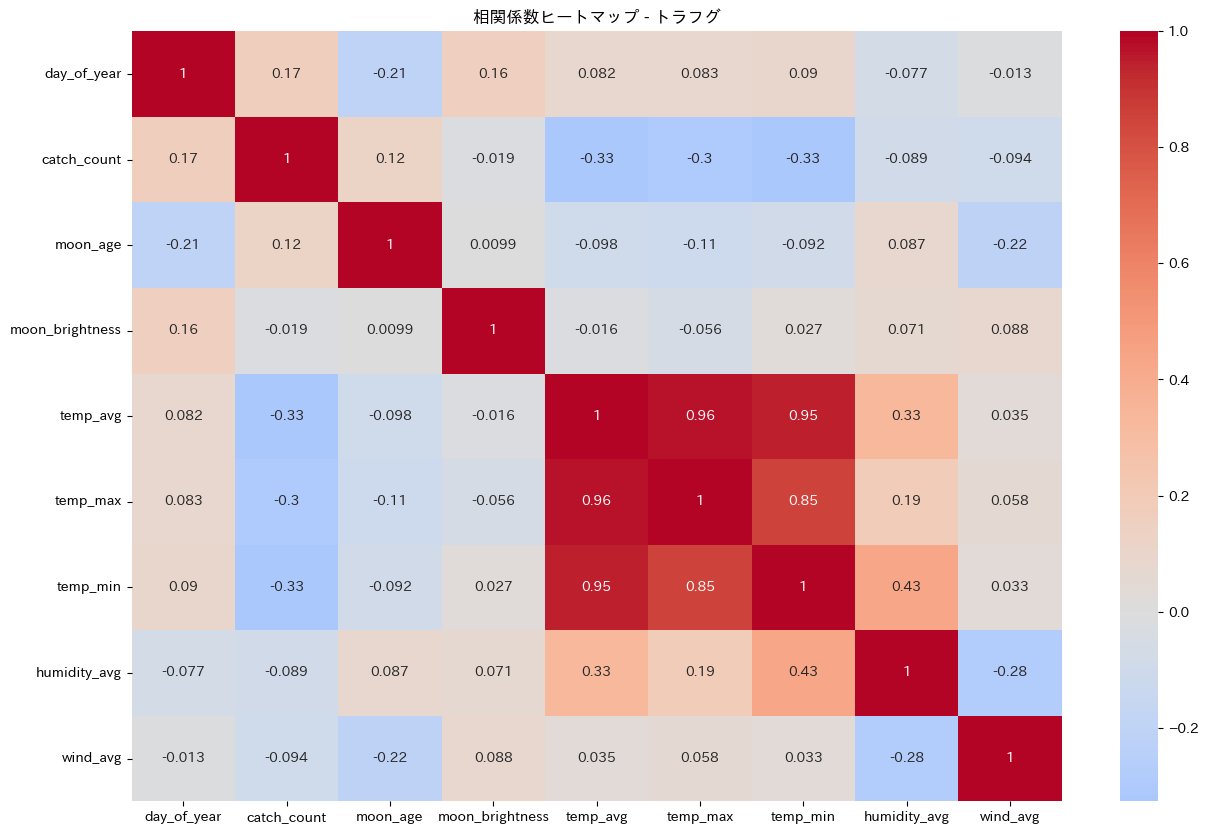

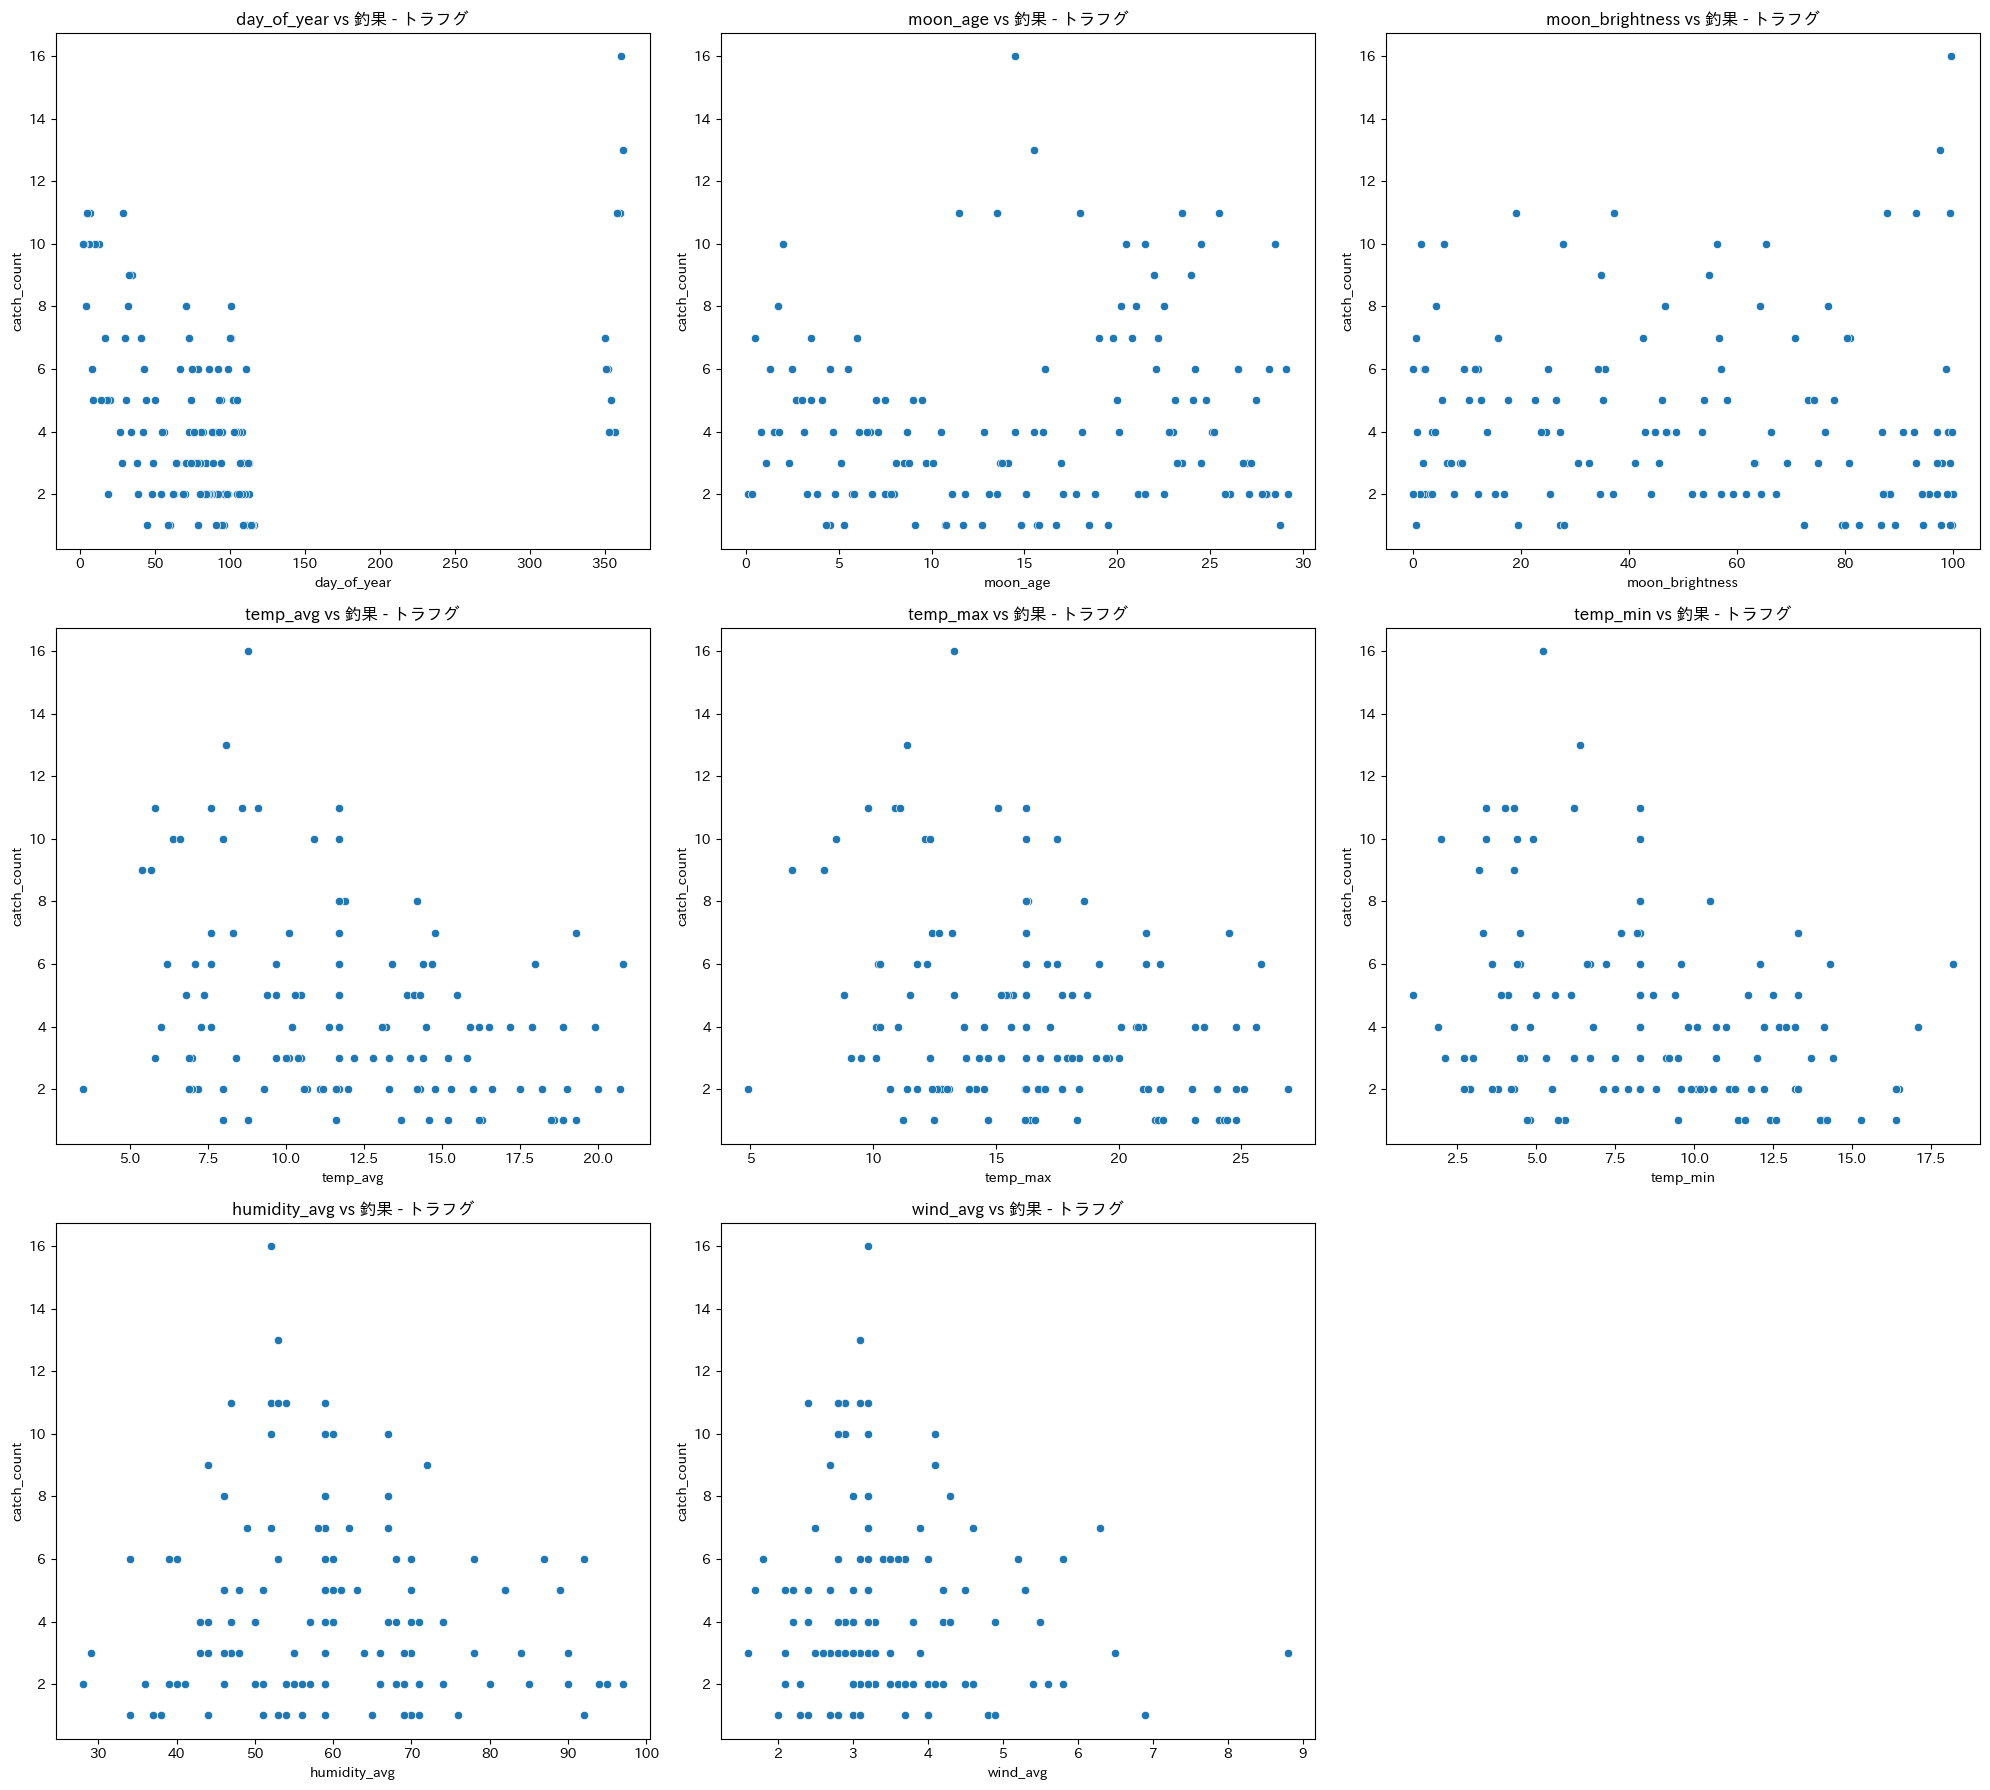

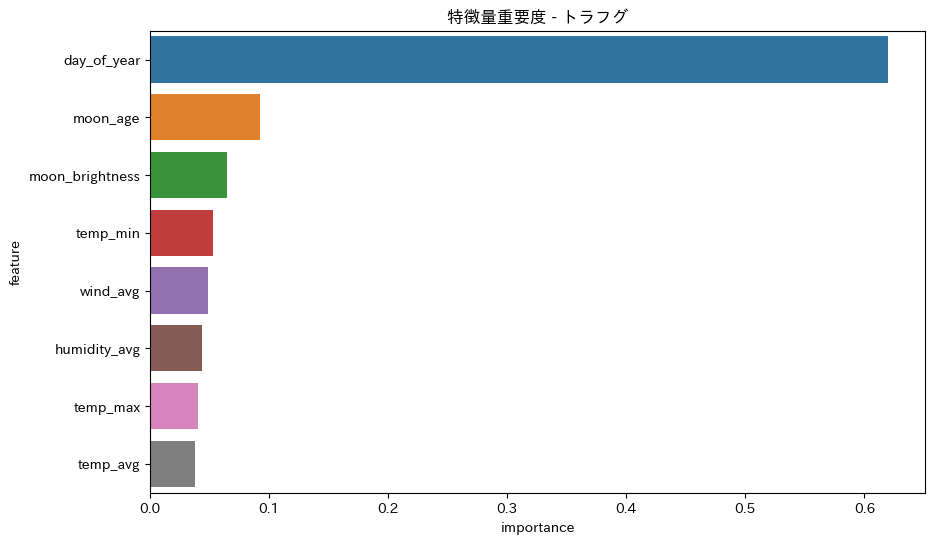

           feature  importance
0      day_of_year    0.620018
1         moon_age    0.092670
2  moon_brightness    0.064276
5         temp_min    0.052376
7         wind_avg    0.048850
6     humidity_avg    0.043958
4         temp_max    0.040579
3         temp_avg    0.037274

その他のフグの分析結果:
欠損値の数:
day_of_year         0
catch_count         0
moon_age            0
moon_brightness     0
temp_avg           49
temp_max           49
temp_min           49
humidity_avg       49
wind_avg           49
dtype: int64

データ形状（前処理後）: (527, 9)


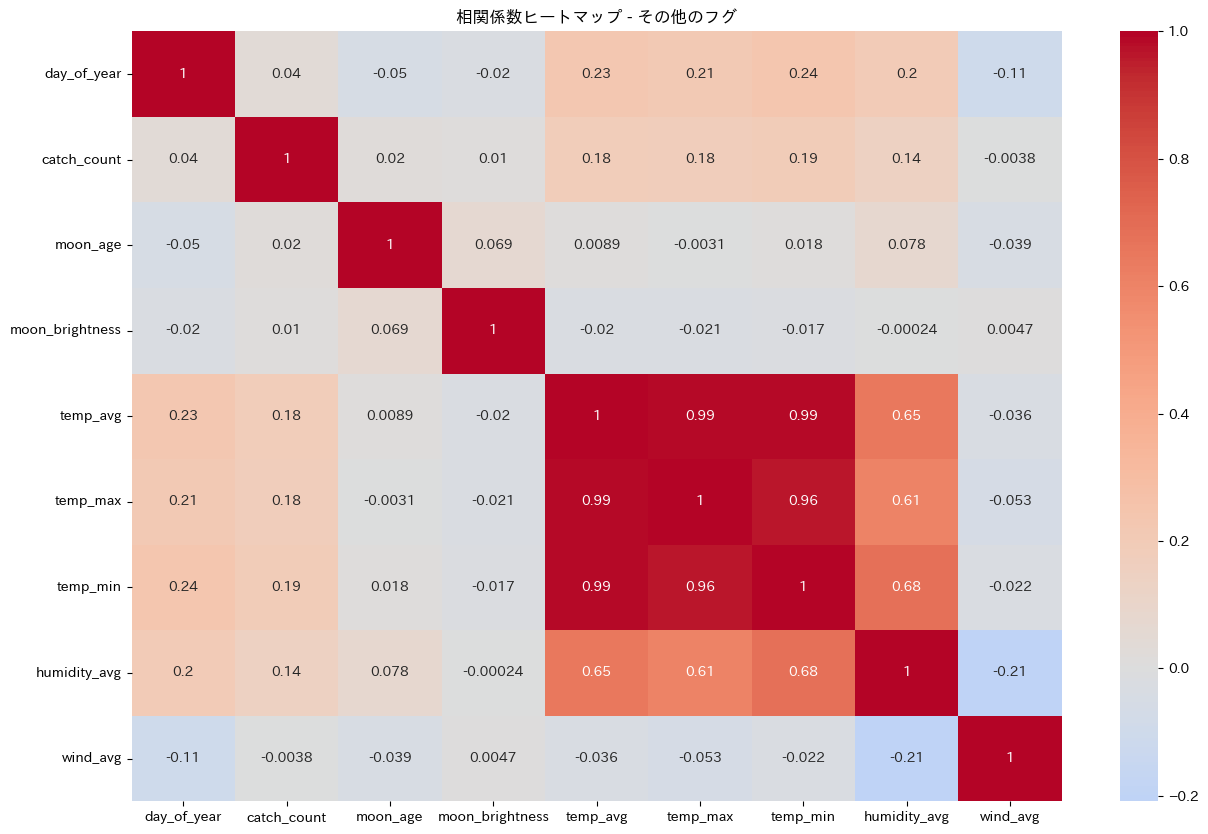

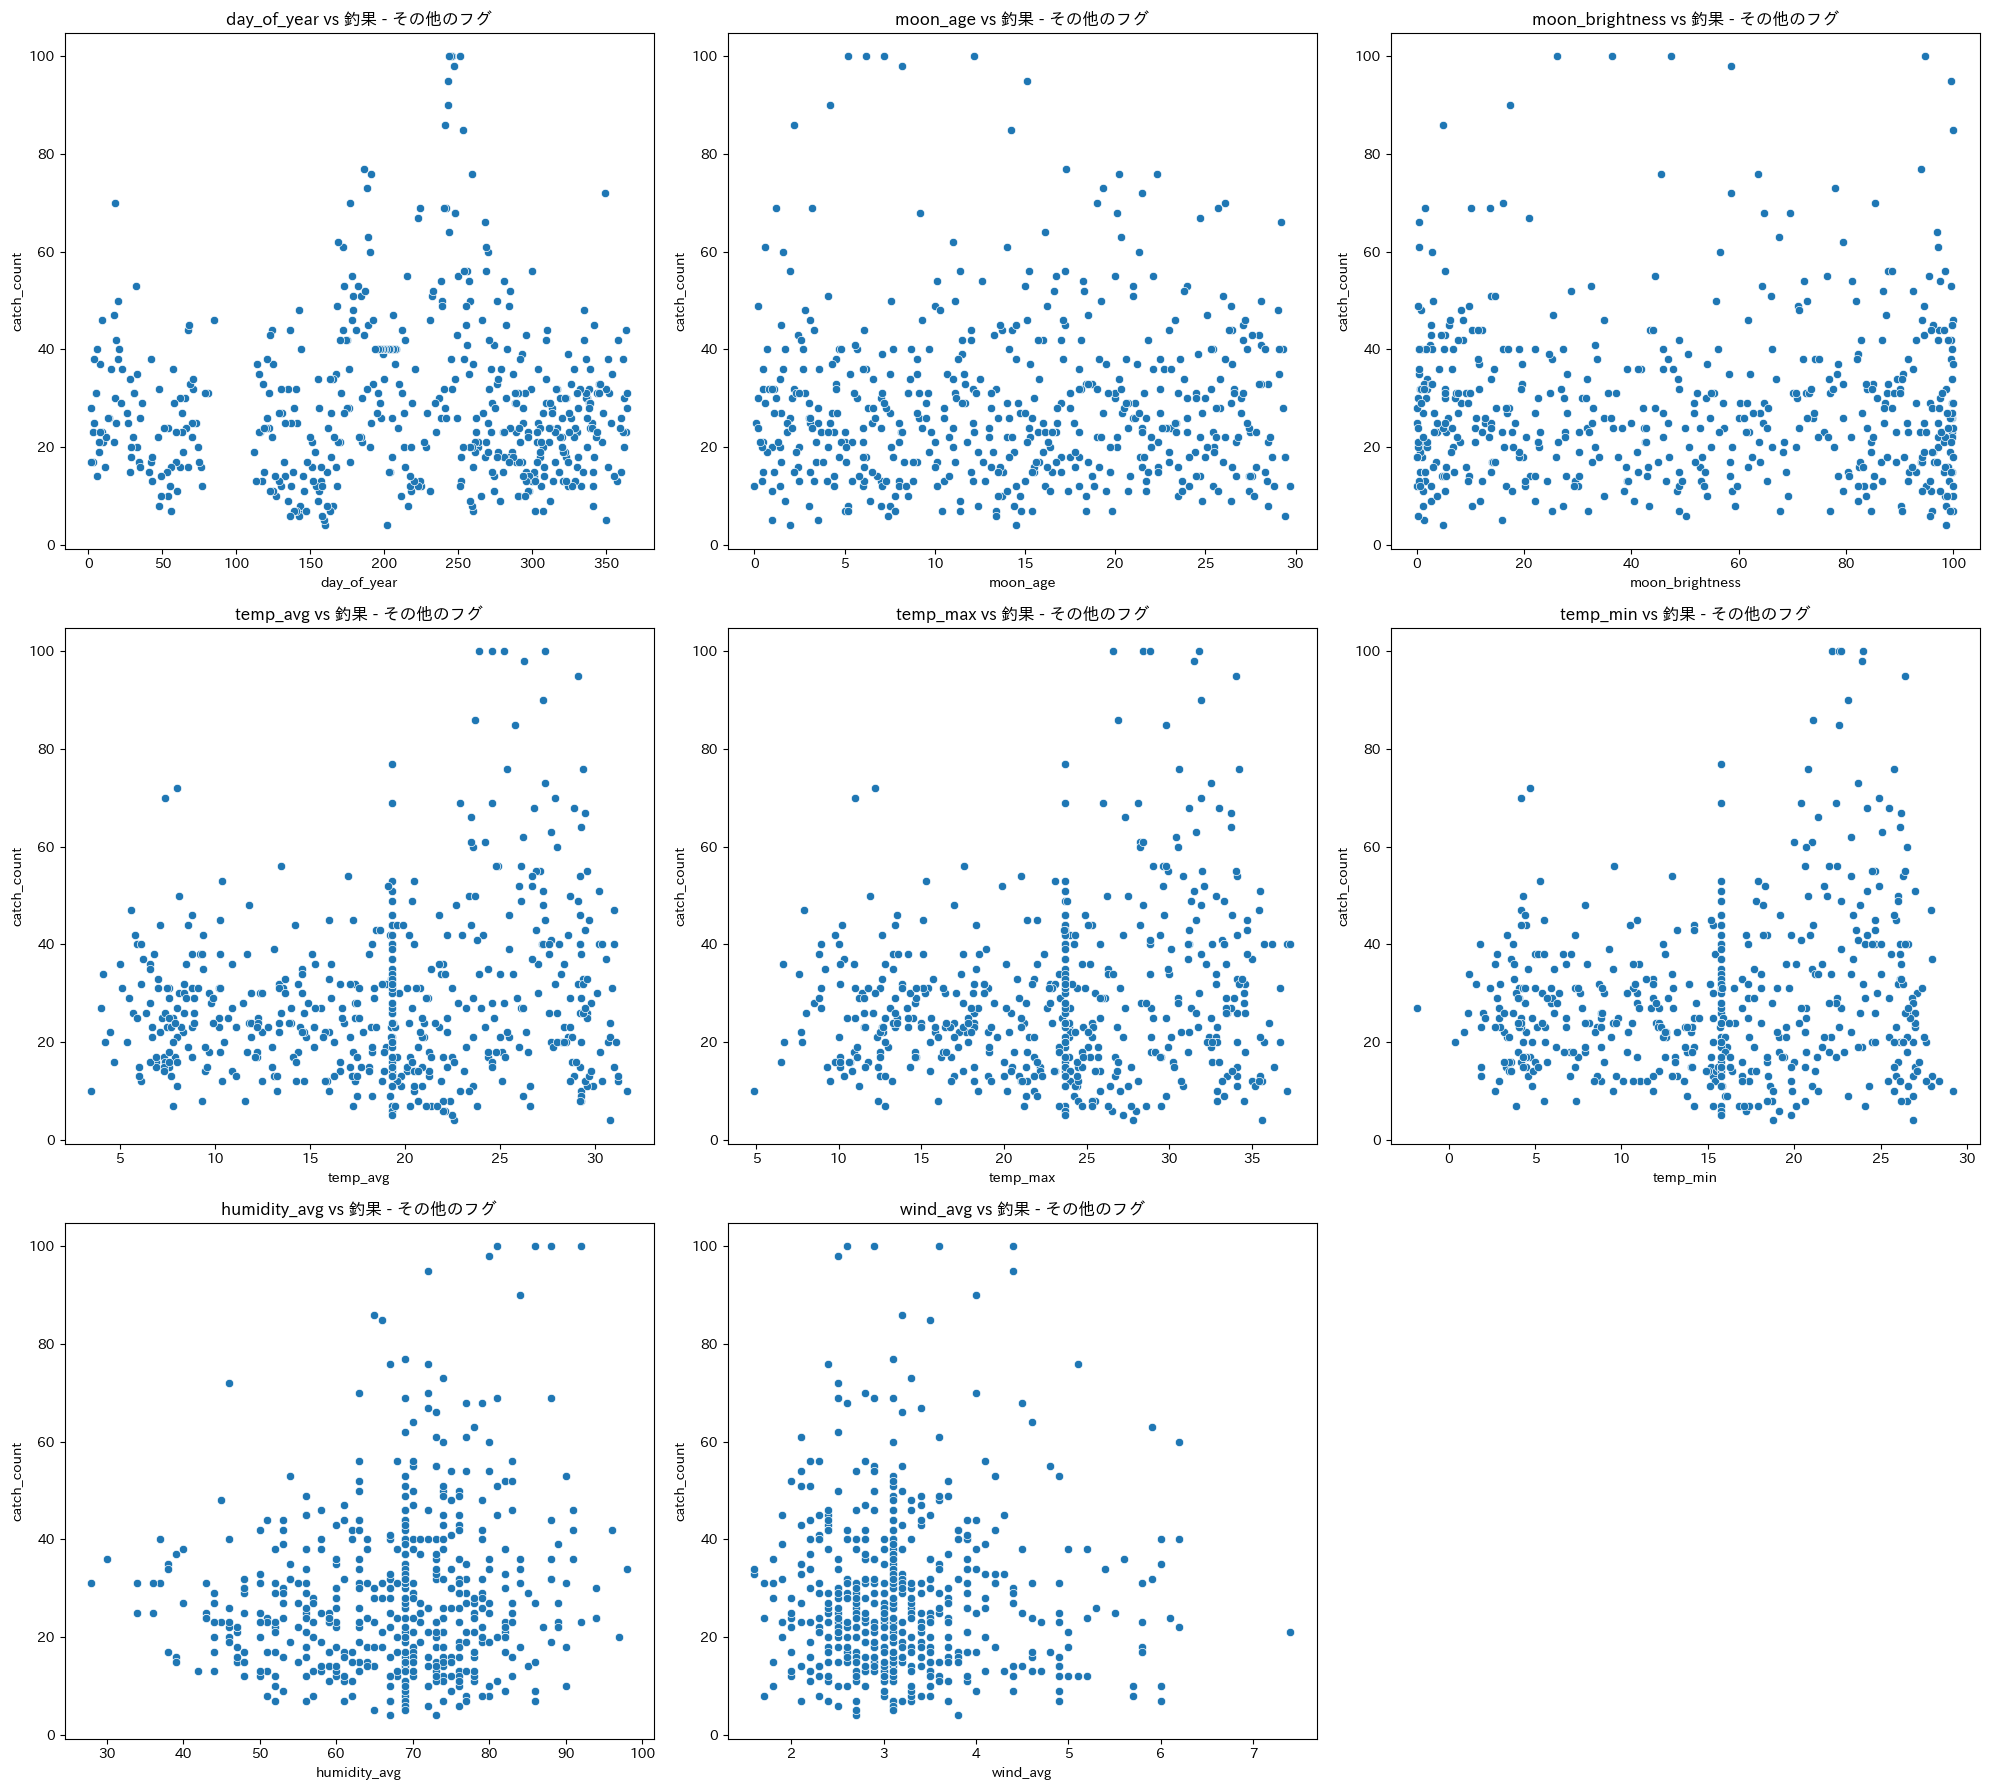

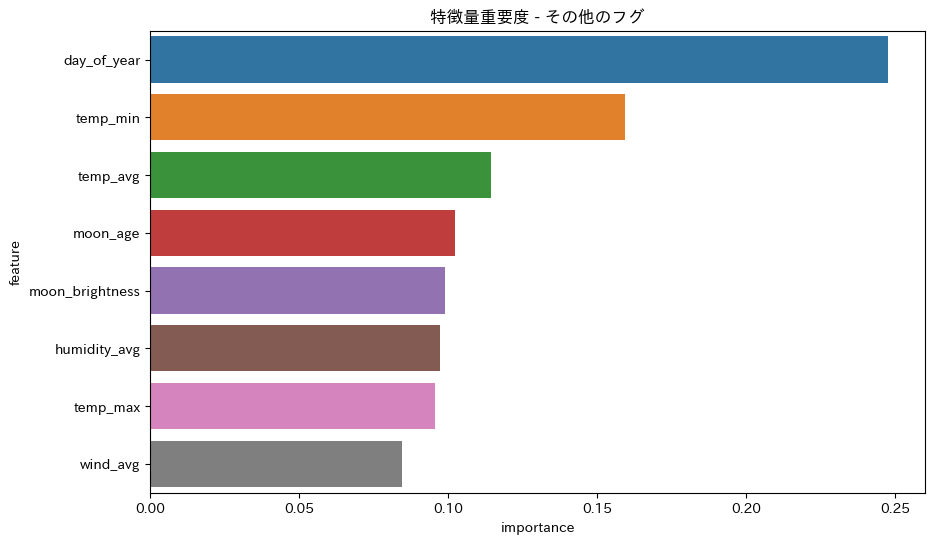

           feature  importance
0      day_of_year    0.247654
5         temp_min    0.159457
3         temp_avg    0.114485
1         moon_age    0.102241
2  moon_brightness    0.098882
6     humidity_avg    0.097305
4         temp_max    0.095607
7         wind_avg    0.084369


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import japanize_matplotlib
import shap

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
def plot_pca_grid(numeric_df):
    # データの準備
    X = numeric_df.drop('catch_count', axis=1)
    y = numeric_df['catch_count']
    
    # スケーリング
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA実行
    pca = PCA(n_components=5)
    X_pca = pca.fit_transform(X_scaled)
    
    # PCの組み合わせを作成
    pc_combinations = [
        (0, 1), (0, 2), (0, 3), (0, 4),
        (1, 2), (1, 3), (1, 4),
        (2, 3), (2, 4),
        (3, 4)
    ]
    
    # グリッドプロット作成
    fig, axes = plt.subplots(4, 3, figsize=(15, 20))
    axes = axes.ravel()
    
    for idx, (pc1, pc2) in enumerate(pc_combinations):
        scatter = axes[idx].scatter(X_pca[:, pc1], X_pca[:, pc2], 
                                  c=y, cmap='viridis', alpha=0.6)
        axes[idx].set_xlabel(f'PC{pc1+1}')
        axes[idx].set_ylabel(f'PC{pc2+1}')
        axes[idx].set_title(f'PC{pc1+1} vs PC{pc2+1}')
        axes[idx].grid(True, alpha=0.3)
        fig.colorbar(scatter, ax=axes[idx], label='釣果 (匹)')
    
    # 余分なサブプロットを非表示
    for idx in range(len(pc_combinations), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # 寄与率の表示
    print("\n主成分の寄与率:")
    explained_variance_df = pd.DataFrame({
        'PC': range(1, 6),
        '寄与率': pca.explained_variance_ratio_,
        '累積寄与率': np.cumsum(pca.explained_variance_ratio_)
    })
    print(explained_variance_df)
    
    # 主成分の重みづけ
    print("\n主成分の重みづけ:")
    loadings_df = pd.DataFrame(
        pca.components_,
        columns=X.columns,
        index=[f'PC{i+1}' for i in range(5)]
    )
    print(loadings_df)

def analyze_fishing_models(numeric_df):
    # データの分割
    X = numeric_df.drop('catch_count', axis=1)
    y = numeric_df['catch_count']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # スケーリング
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # モデルの学習と予測
    models = {
        'ランダムフォレスト': RandomForestRegressor(n_estimators=100, random_state=42),
        '重回帰分析': LinearRegression()
    }
    
    predictions = {}
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        predictions[name] = model.predict(X_test_scaled)
        
        # yyプロット
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, predictions[name], alpha=0.6)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel('実測値')
        plt.ylabel('予測値')
        plt.title(f'{name}予測')
        plt.show()
        
        # モデル性能の表示
        print(f"\n{name}の係数:")
        if name == '重回帰分析':
            coef_df = pd.DataFrame({
                '変数': X.columns,
                '係数': model.coef_
            })
            print(coef_df.sort_values('係数', ascending=False))
    
    # 主成分分析
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_train_scaled)
    
    # PC1 vs PC2の散布図
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
    plt.colorbar(scatter, label='釣果 (匹)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('主成分分析 (PC1 vs PC2)')
    plt.show()
    
    # 主成分の寄与率と重み
    print("\n主成分の寄与率:")
    print(pd.DataFrame({
        'PC': range(1, 4),
        '寄与率': pca.explained_variance_ratio_,
        '累積寄与率': np.cumsum(pca.explained_variance_ratio_)
    }))
    
    print("\n主成分の重みづけ:")
    print(pd.DataFrame(
        pca.components_[:3],
        columns=X.columns,
        index=['PC1', 'PC2', 'PC3']
    ))
    # 関数の実行
    plot_pca_grid(numeric_df)

TypeError: float() argument must be a string or a number, not 'datetime.date'

トラフグデータ数: 134
その他フグデータ数: 527

day_of_yearを含む分析:
欠損値の数:
day_of_year         0
catch_count         0
moon_age            0
moon_brightness     0
temp_avg           18
temp_max           18
temp_min           18
humidity_avg       18
wind_avg           18
dtype: int64

データ形状（前処理後）: (134, 9)


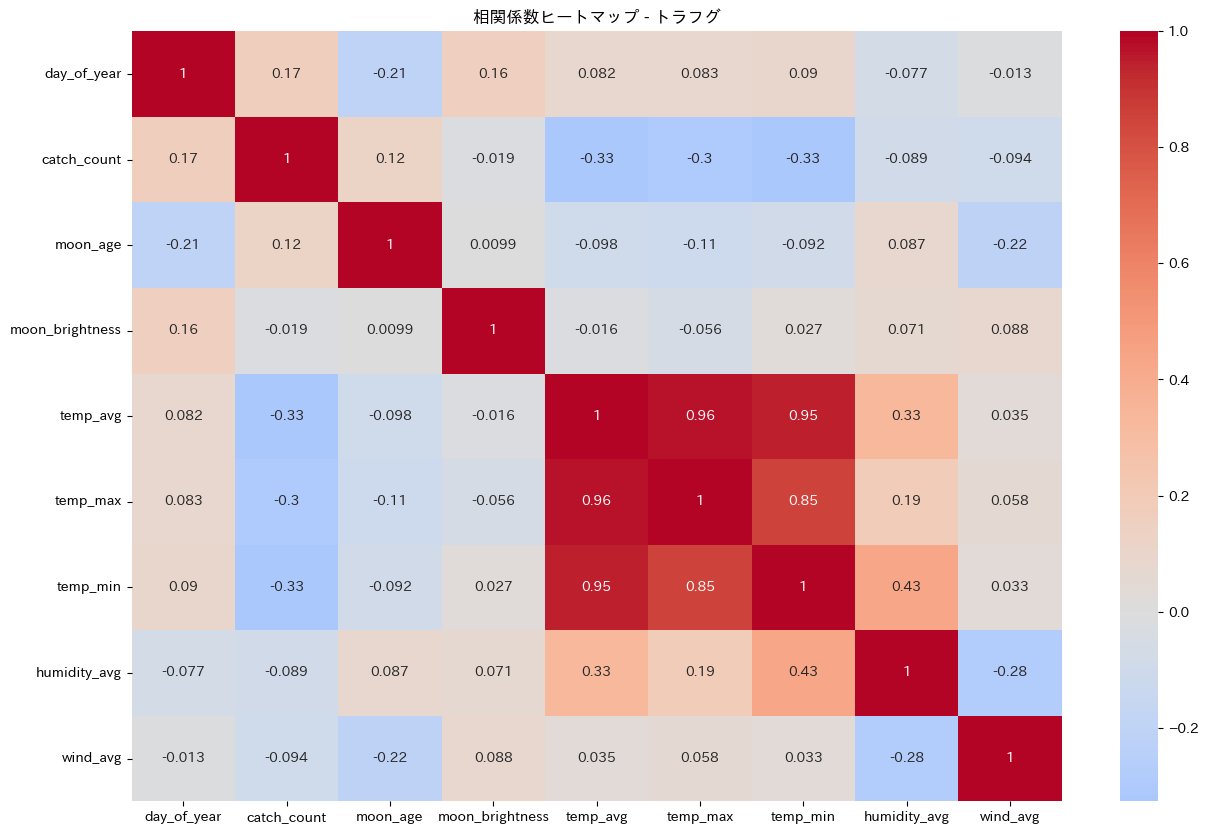

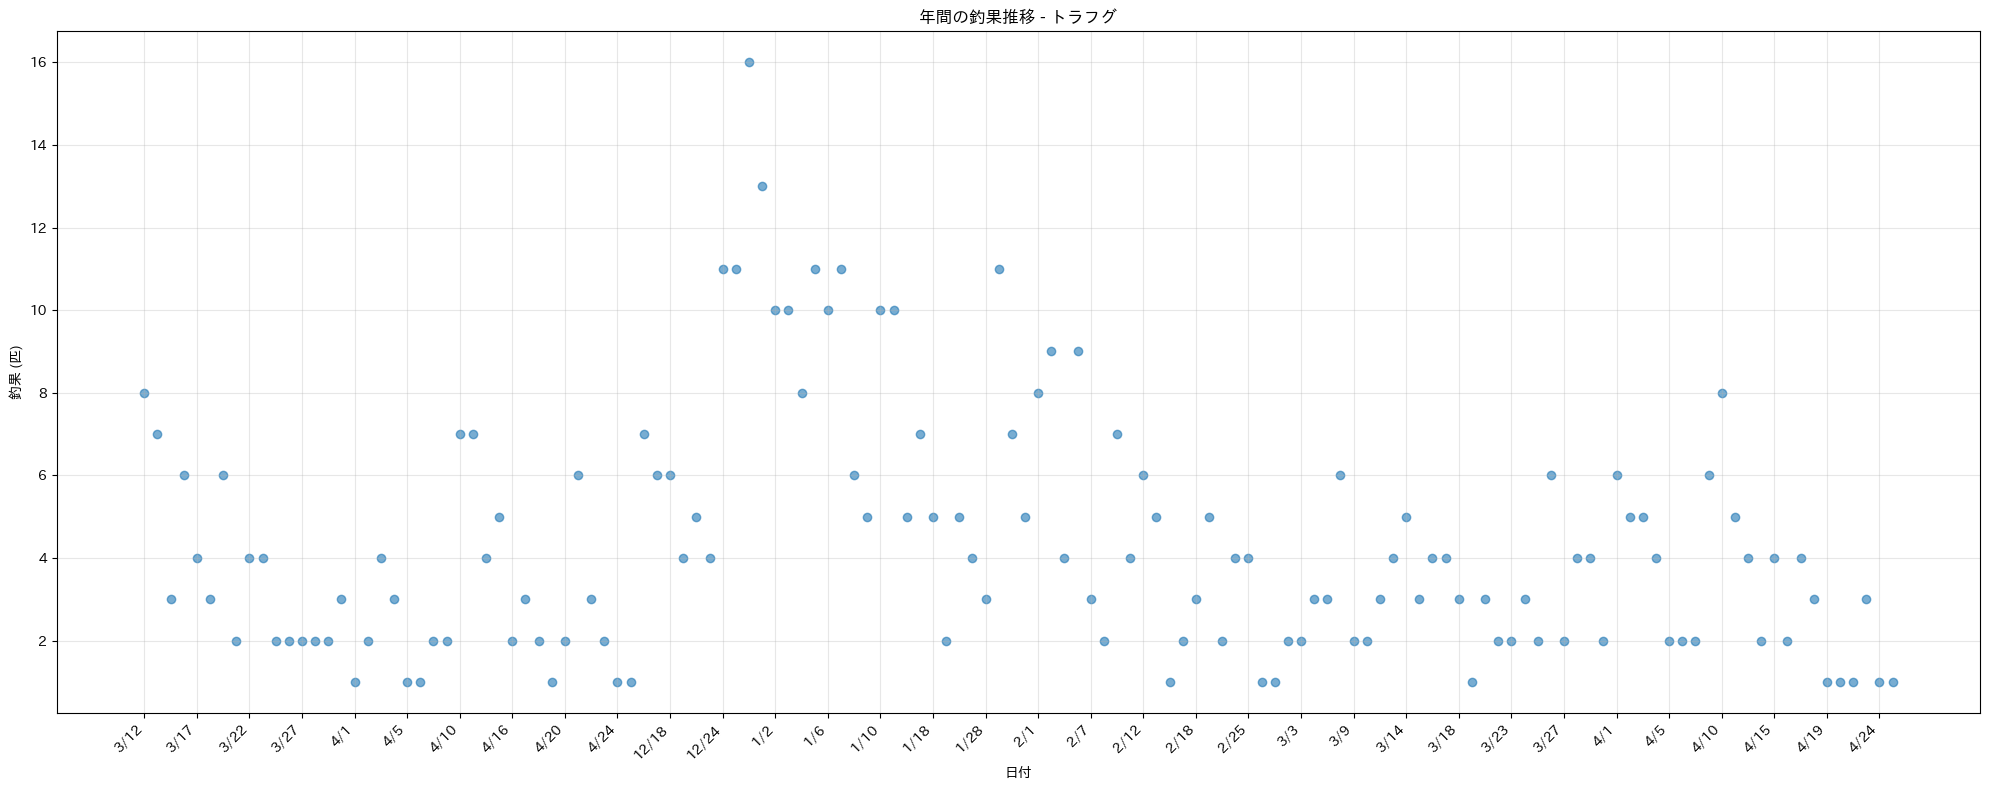

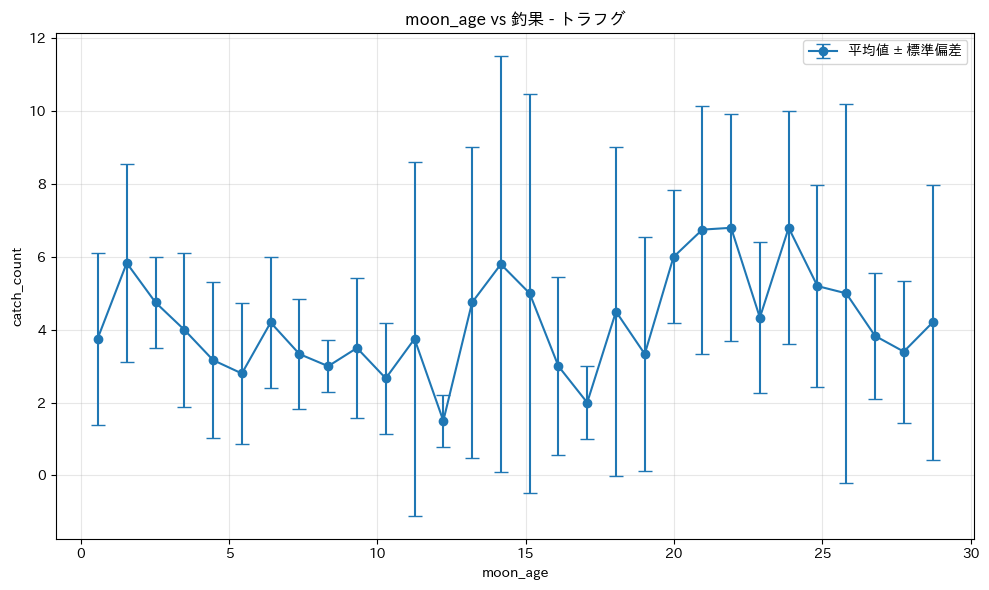

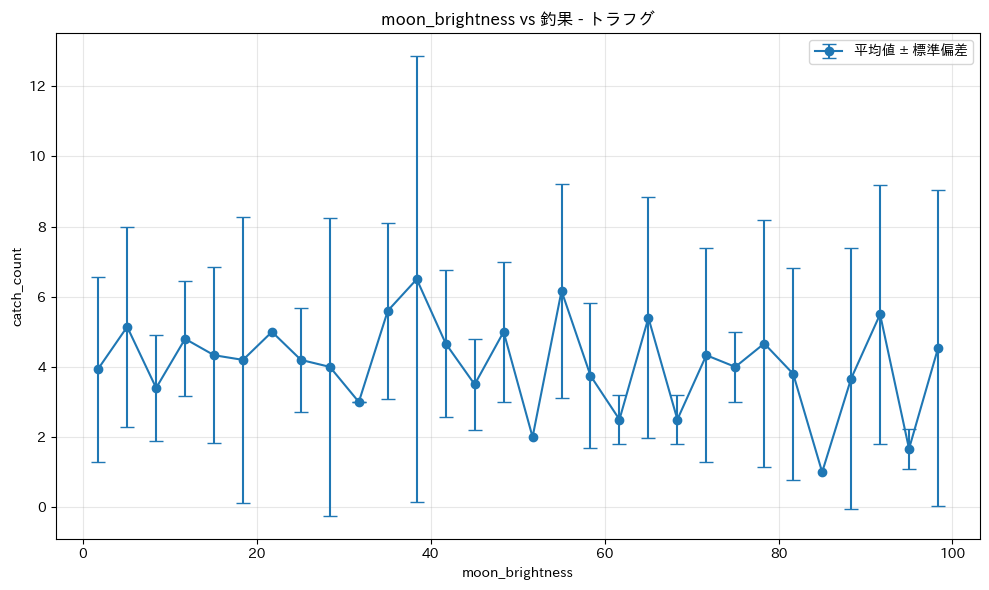

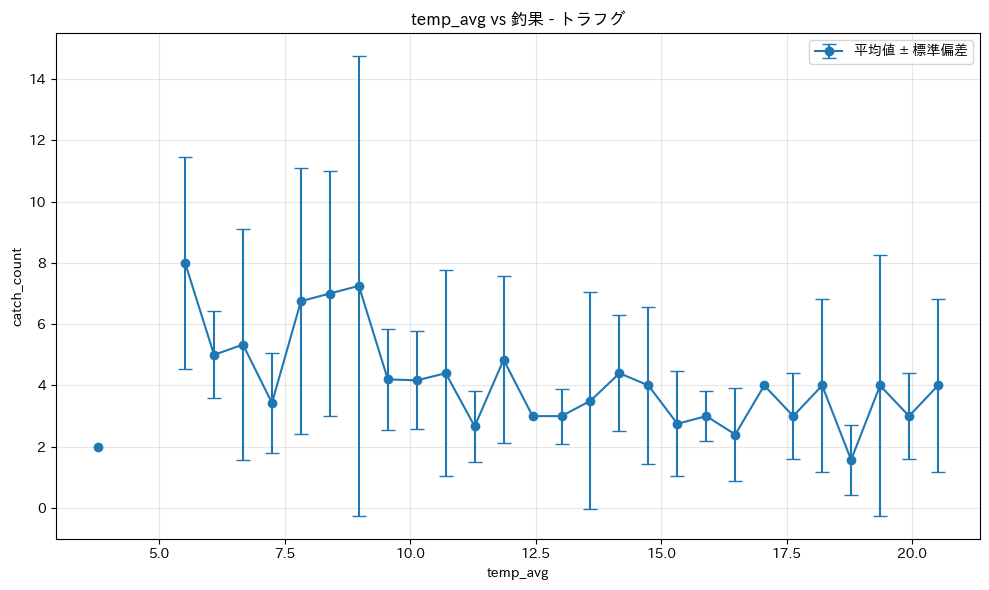

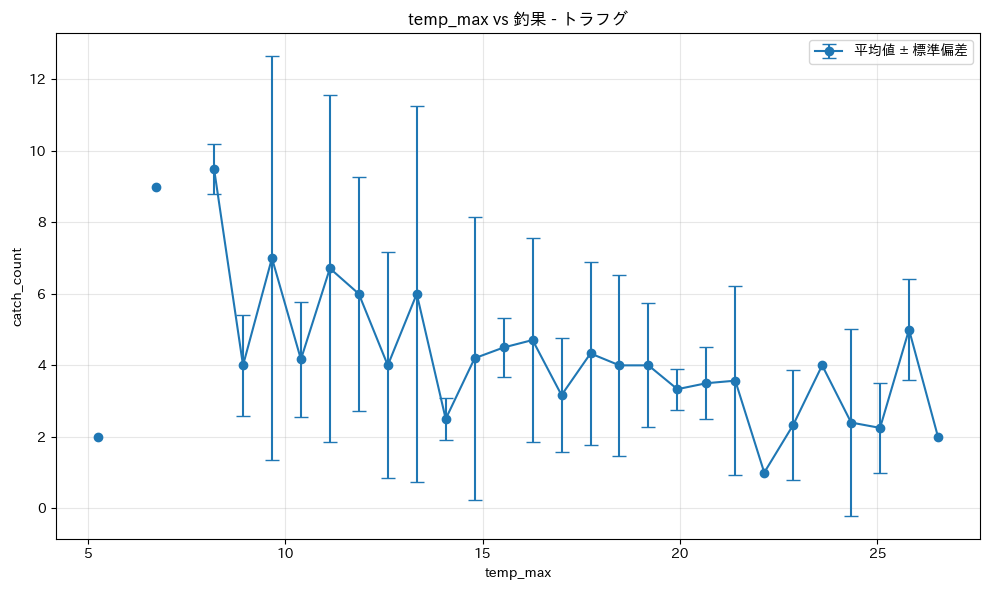

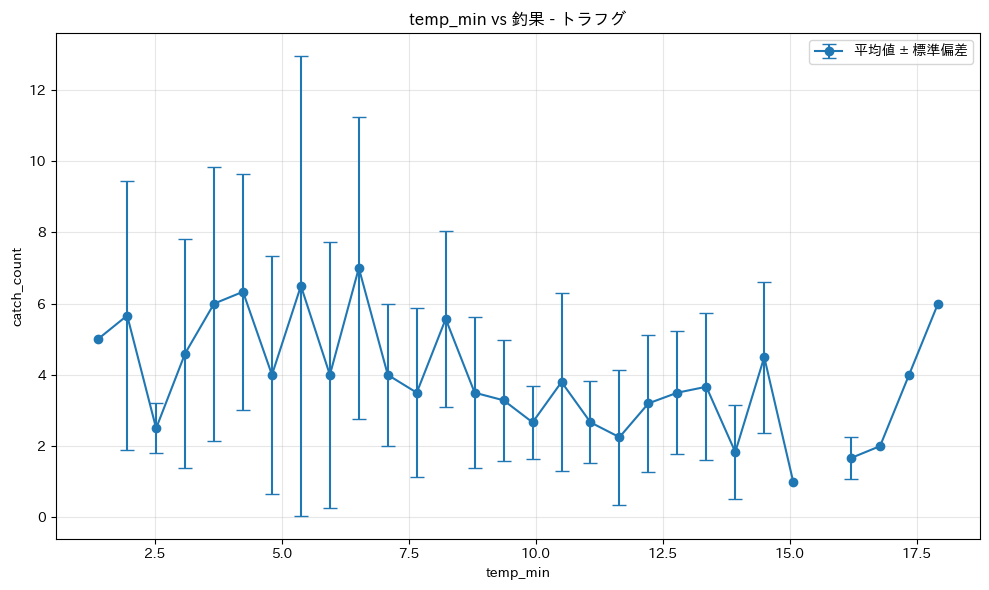

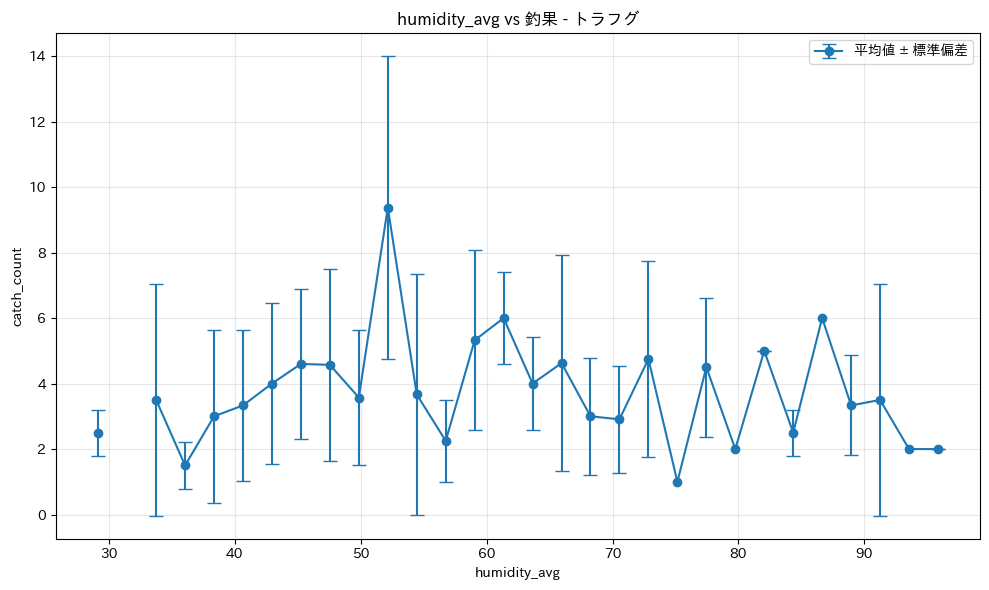

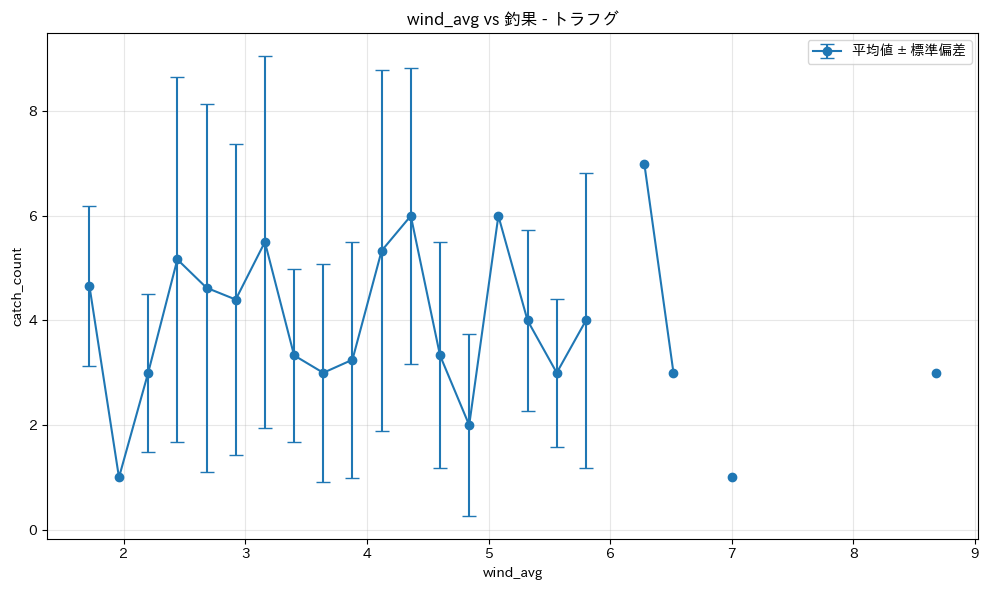

<Figure size 640x480 with 0 Axes>

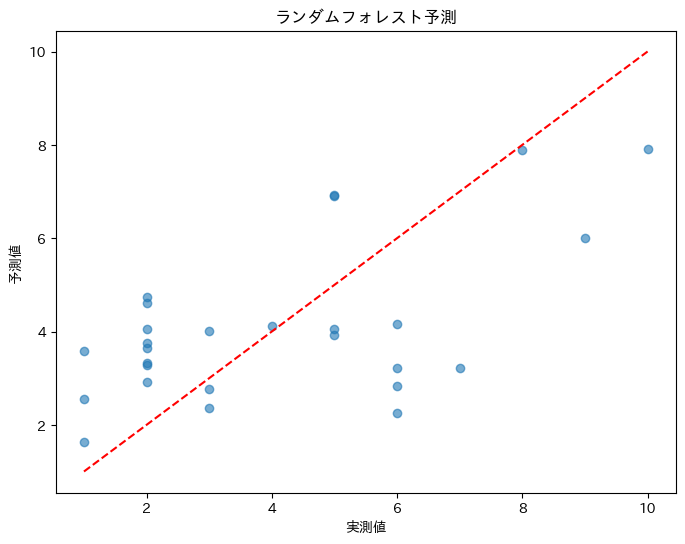


ランダムフォレストの係数:


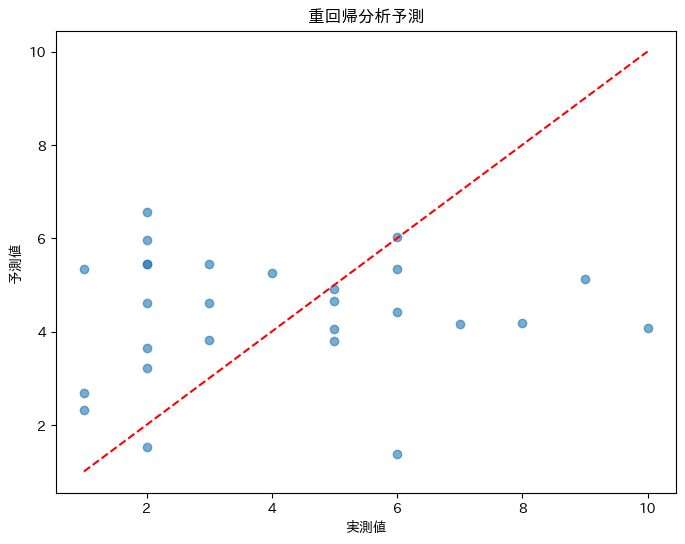


重回帰分析の係数:
                変数        係数
4         temp_max  1.205671
0      day_of_year  0.820037
1         moon_age  0.429408
6     humidity_avg  0.149237
2  moon_brightness -0.158167
7         wind_avg -0.168819
5         temp_min -0.320423
3         temp_avg -2.039861


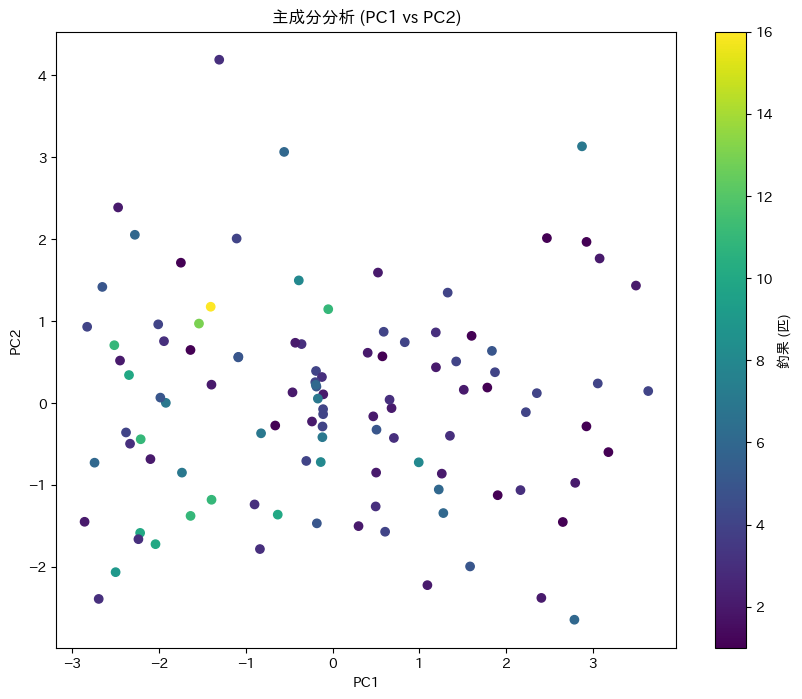


主成分の寄与率:
   PC       寄与率     累積寄与率
0   1  0.378329  0.378329
1   2  0.192361  0.570690
2   3  0.144391  0.715081

主成分の重みづけ:
     day_of_year  moon_age  moon_brightness  temp_avg  temp_max  temp_min  \
PC1     0.017606  0.007691         0.027010  0.567107  0.538367  0.558885   
PC2     0.336367 -0.529686         0.150929  0.064568  0.114755  0.025559   
PC3     0.628616  0.008701         0.661647 -0.051898 -0.102309  0.011786   

     humidity_avg  wind_avg  
PC1      0.273649  0.014684  
PC2     -0.465133  0.590907  
PC3      0.196956 -0.338967  


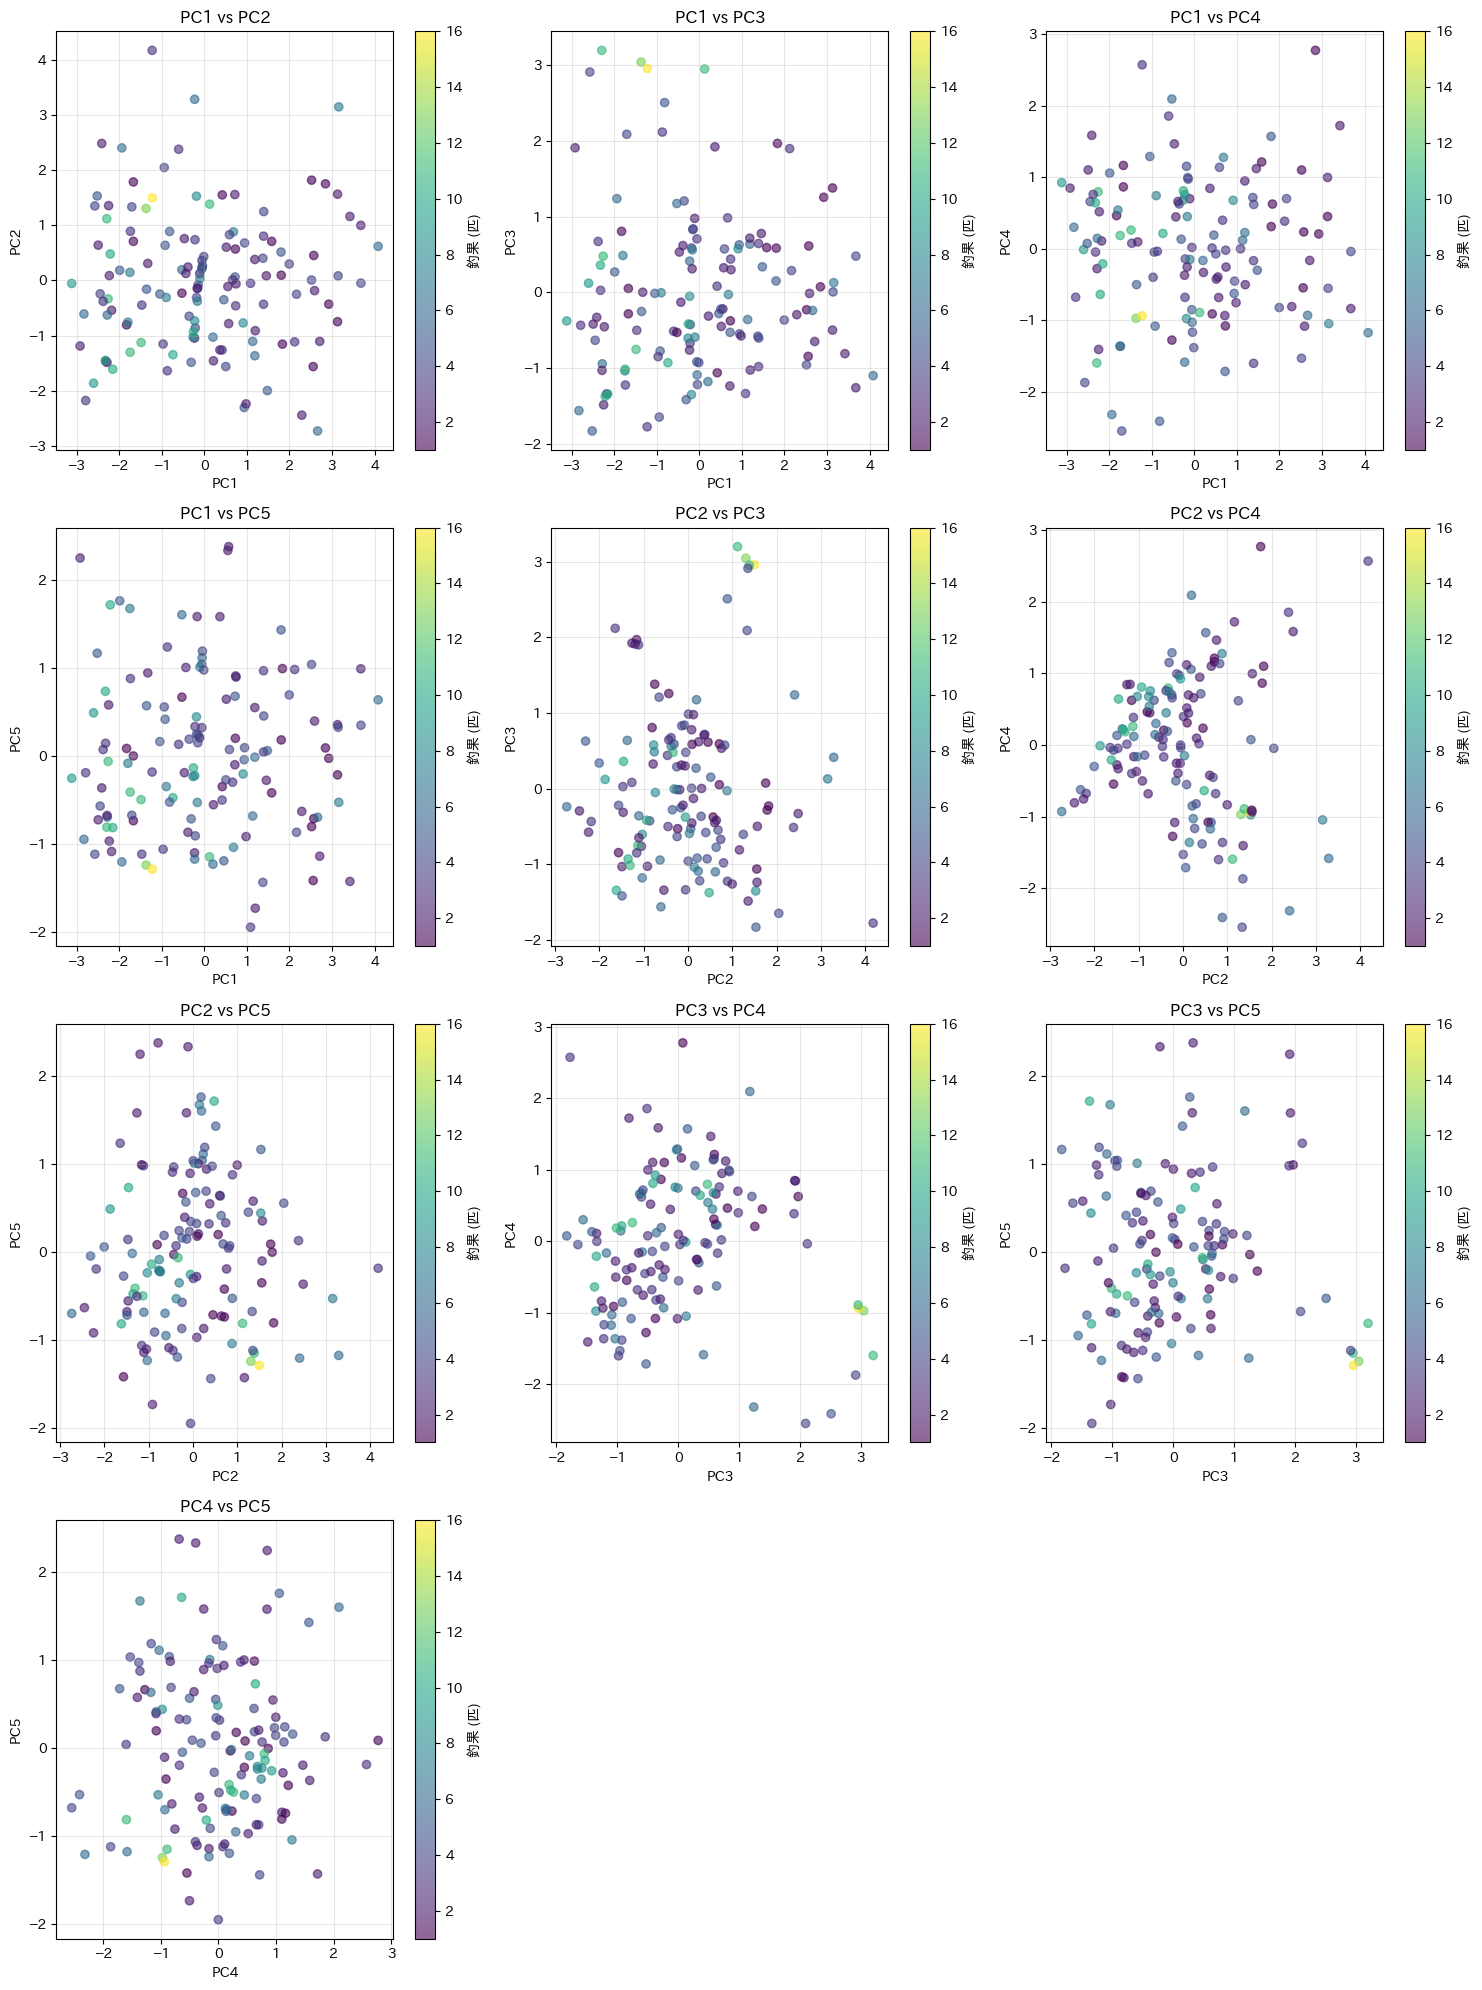


主成分の寄与率:
   PC       寄与率     累積寄与率
0   1  0.376663  0.376663
1   2  0.182153  0.558816
2   3  0.141671  0.700487
3   4  0.119930  0.820417
4   5  0.098165  0.918582

主成分の重みづけ:
     day_of_year  moon_age  moon_brightness  temp_avg  temp_max  temp_min  \
PC1     0.069060 -0.080077         0.002211  0.568386  0.538661  0.556699   
PC2     0.372189 -0.542904         0.142203  0.020727  0.079186 -0.016289   
PC3     0.562651 -0.003152         0.701194 -0.070846 -0.140407  0.004031   
PC4    -0.481969  0.361284         0.597897  0.031874  0.003554  0.058787   
PC5    -0.387133 -0.697358         0.049365 -0.107156 -0.199431 -0.005692   

     humidity_avg  wind_avg  
PC1      0.256197  0.006774  
PC2     -0.463394  0.569921  
PC3      0.292469 -0.285400  
PC4      0.017897  0.524304  
PC5      0.553837  0.057962  


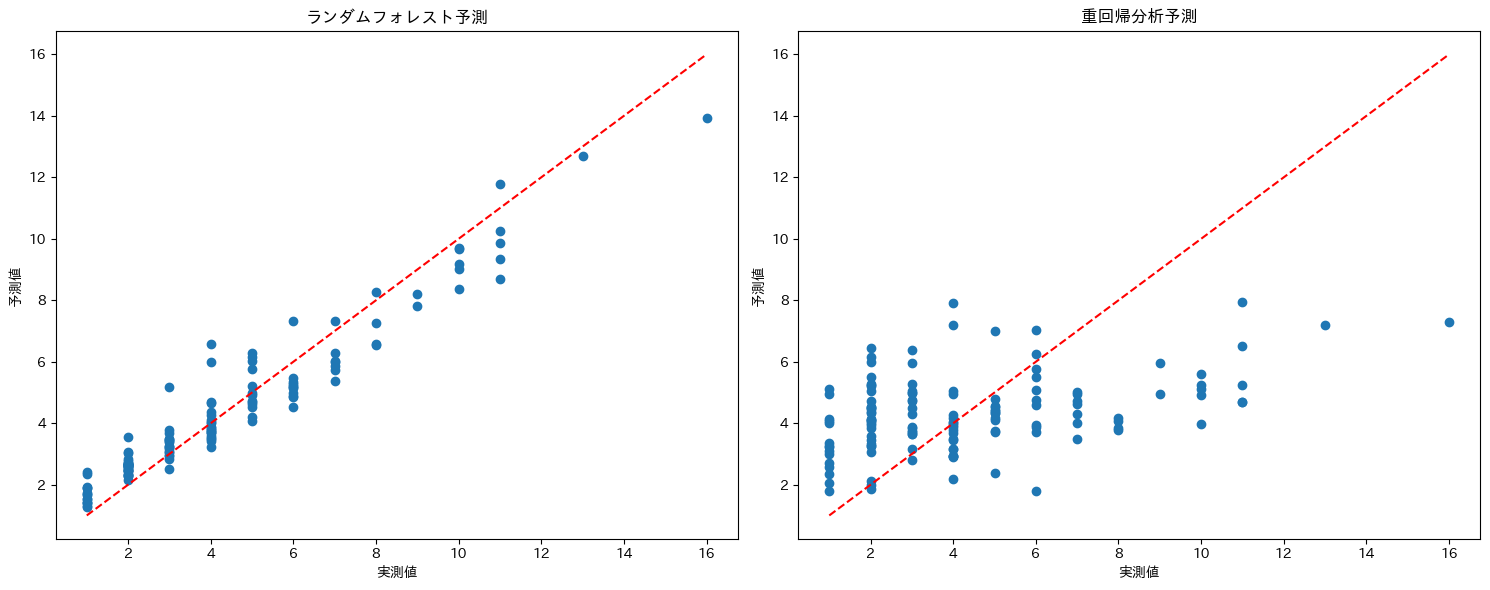


重回帰式:
釣果 = 4.76 + (0.01 × day_of_year) + (0.04 × moon_age) + (-0.00 × moon_brightness) + (-0.44 × temp_avg) + (0.21 × temp_max) + (-0.06 × temp_min) + (0.02 × humidity_avg) + (-0.08 × wind_avg)
           feature  rf_importance   lr_coef
0      day_of_year       0.620018  0.008548
1         moon_age       0.092670  0.043296
2  moon_brightness       0.064276 -0.004210
5         temp_min       0.052376 -0.064138
7         wind_avg       0.048850 -0.082146
6     humidity_avg       0.043958  0.017430
4         temp_max       0.040579  0.213889
3         temp_avg       0.037274 -0.444736

day_of_yearを含む分析:
欠損値の数:
day_of_year         0
catch_count         0
moon_age            0
moon_brightness     0
temp_avg           49
temp_max           49
temp_min           49
humidity_avg       49
wind_avg           49
dtype: int64

データ形状（前処理後）: (527, 9)


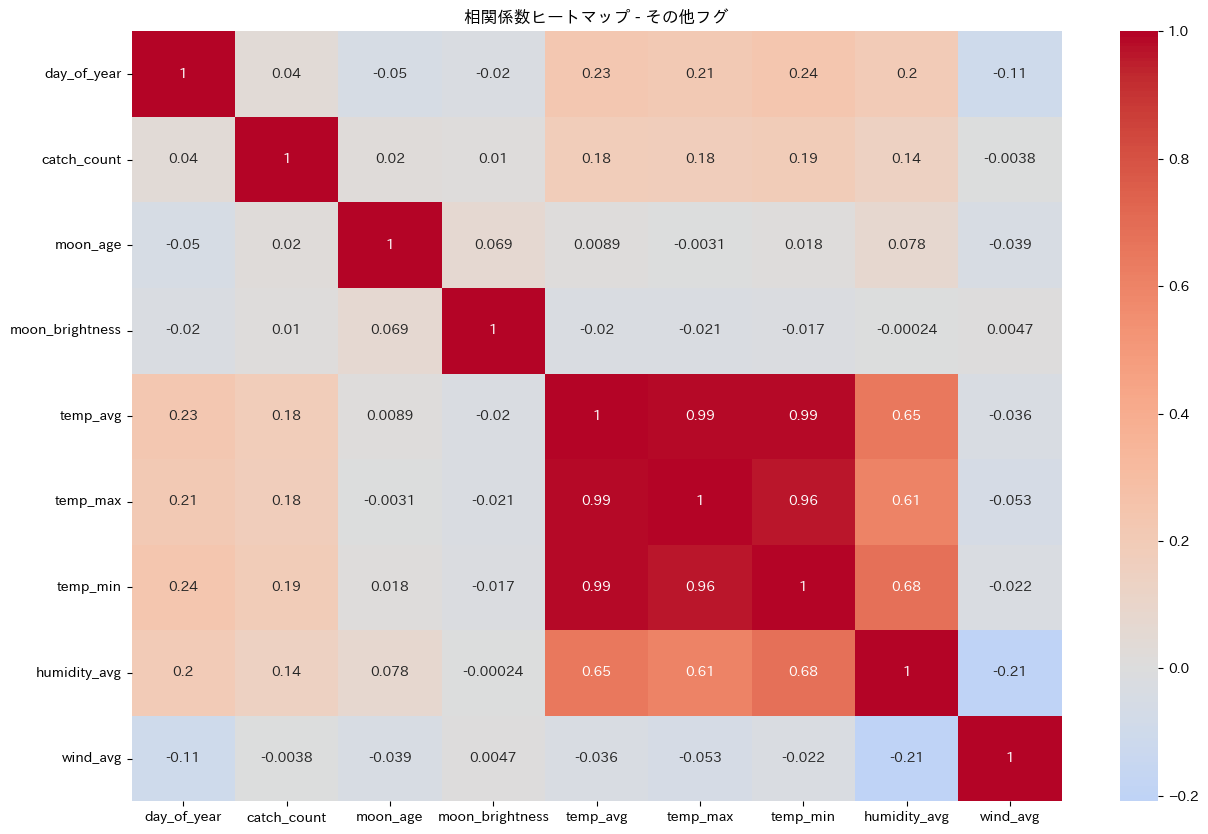

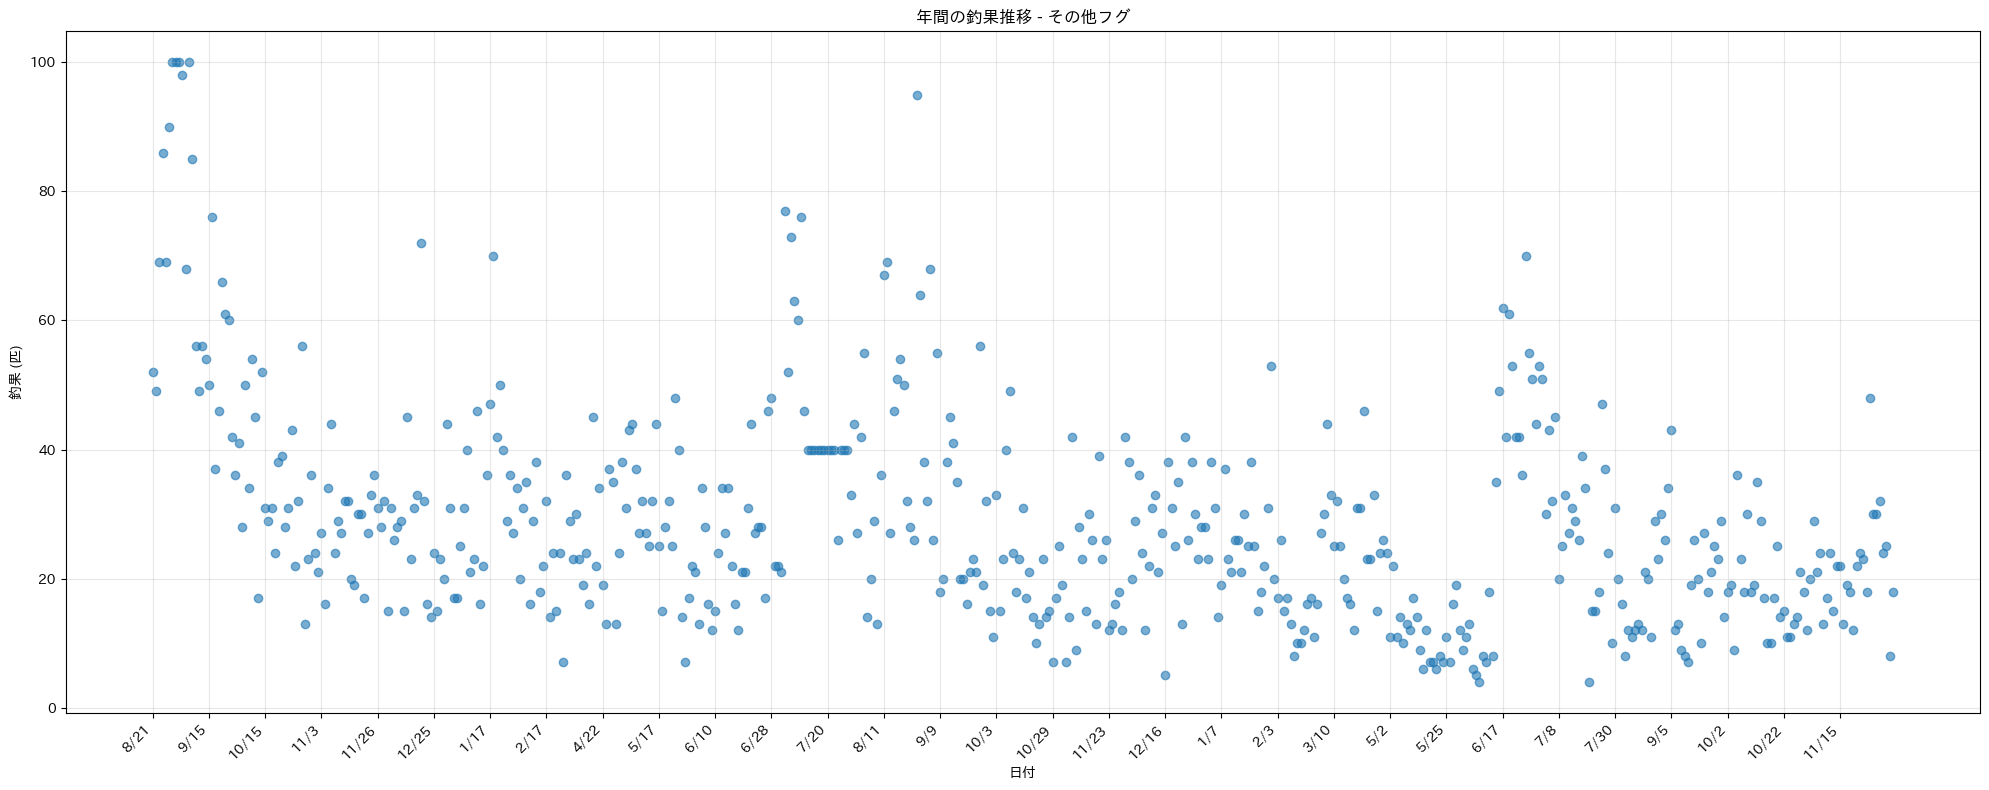

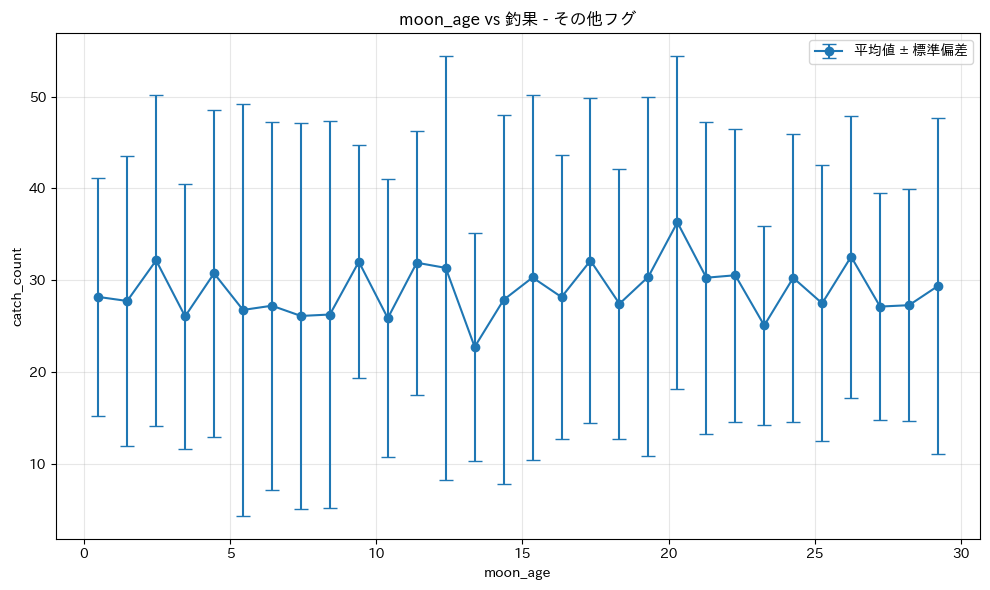

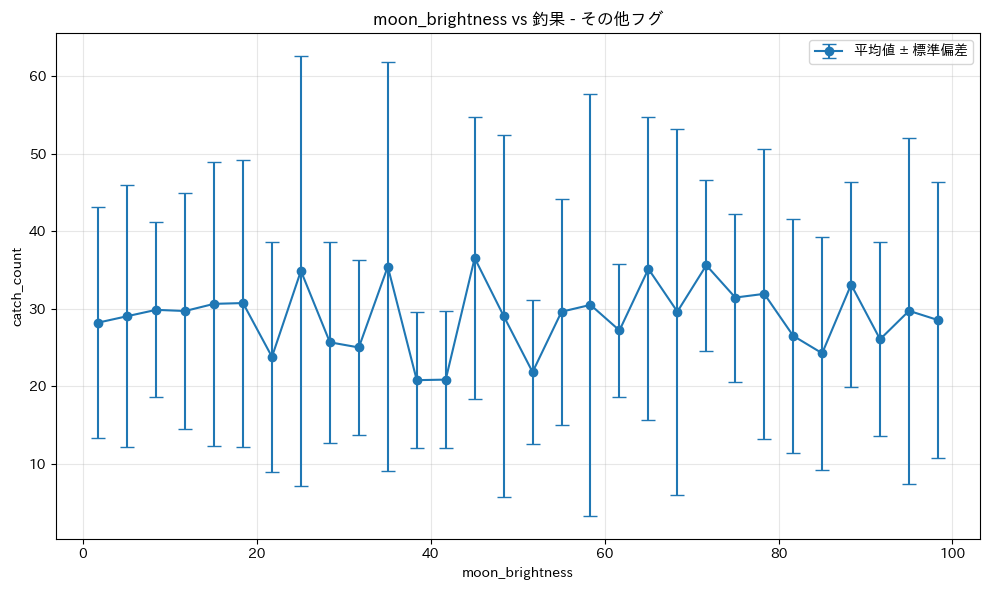

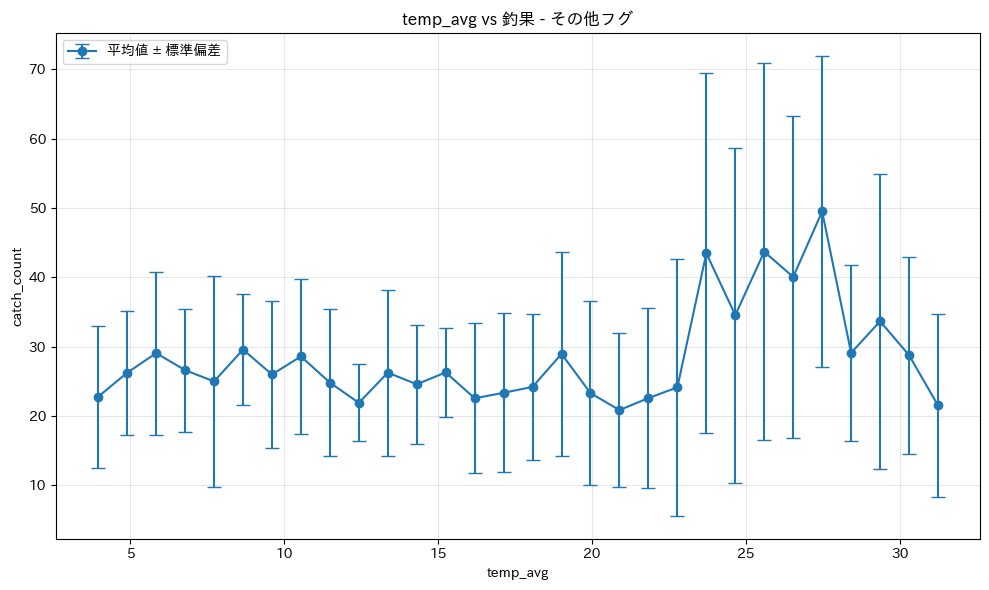

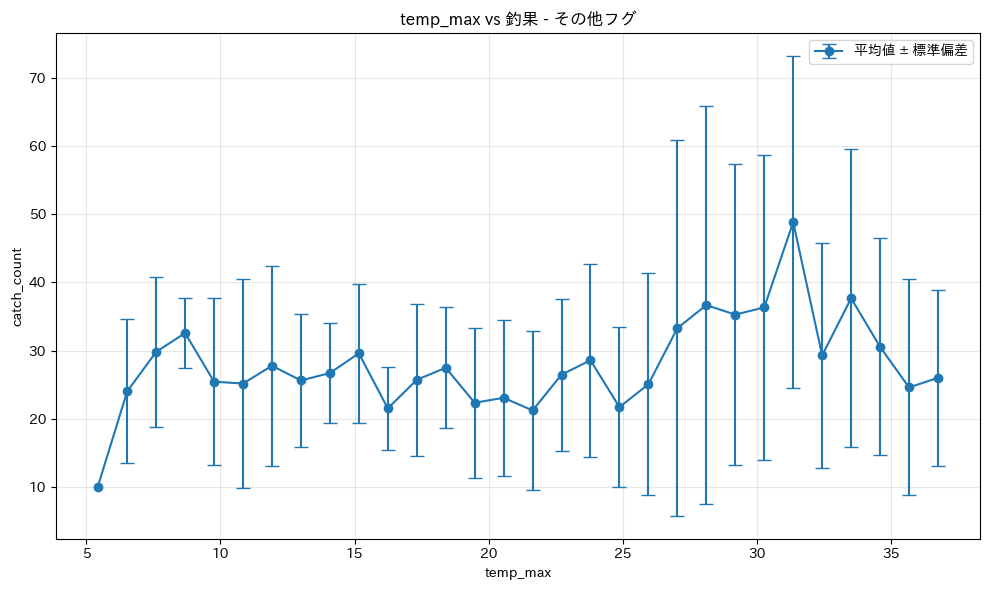

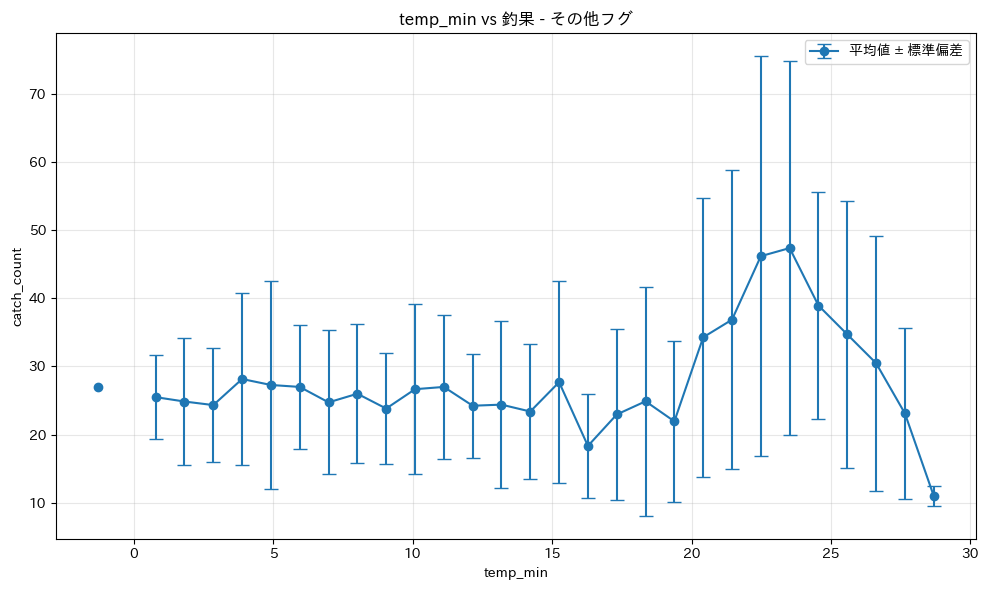

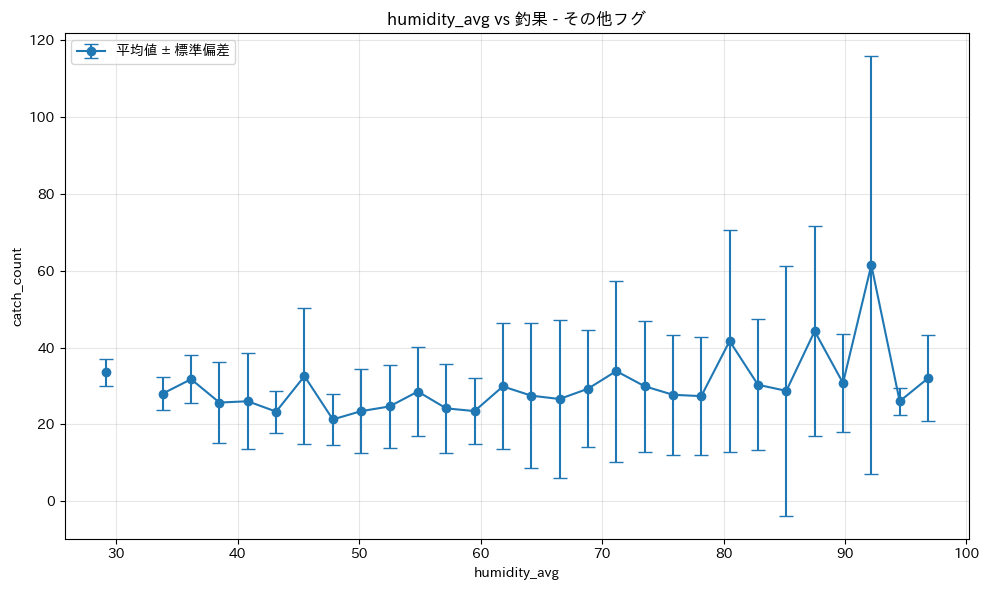

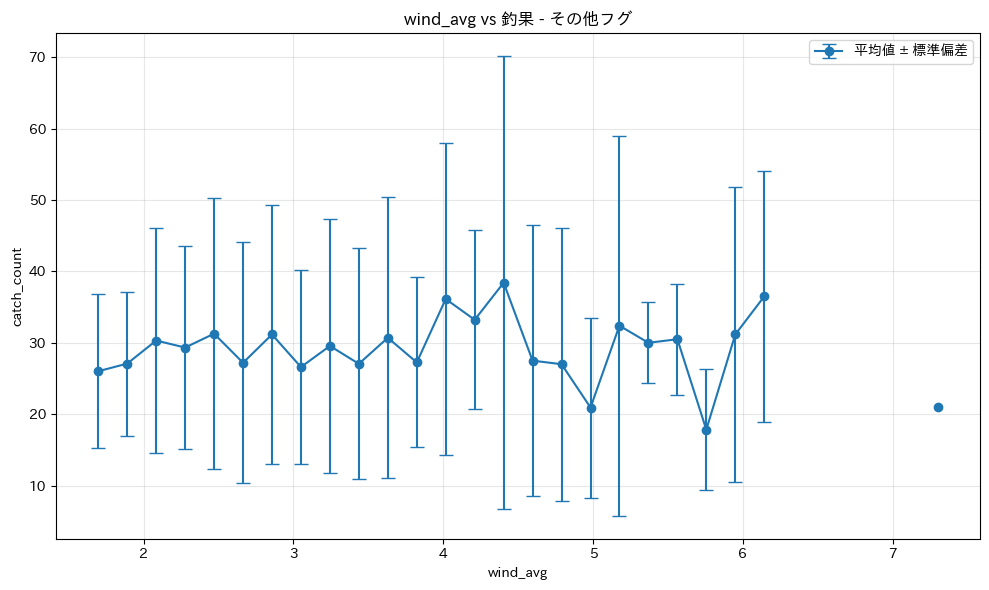

<Figure size 640x480 with 0 Axes>

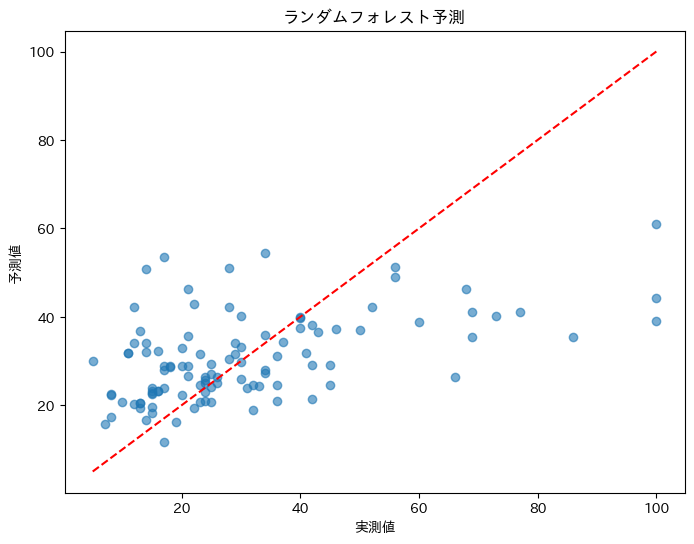


ランダムフォレストの係数:


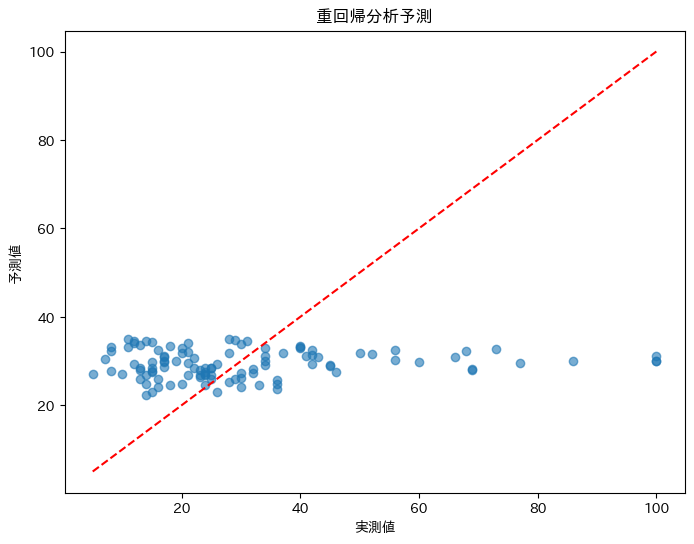


重回帰分析の係数:
                変数         係数
5         temp_min  10.582712
4         temp_max   5.720655
2  moon_brightness   0.648234
1         moon_age   0.199049
7         wind_avg   0.005286
0      day_of_year  -0.447164
6     humidity_avg  -1.117210
3         temp_avg -12.570808


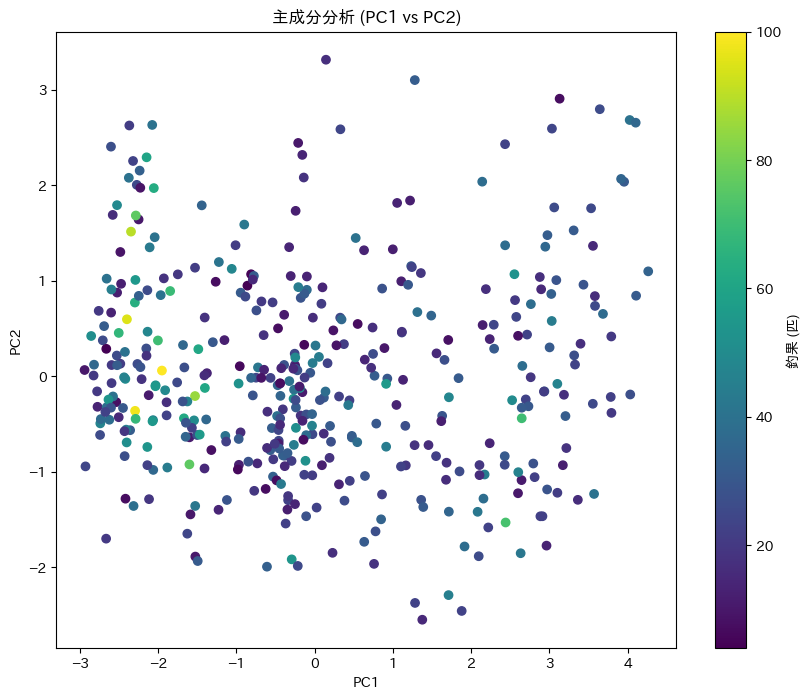


主成分の寄与率:
   PC       寄与率     累積寄与率
0   1  0.451003  0.451003
1   2  0.139588  0.590591
2   3  0.131434  0.722025

主成分の重みづけ:
     day_of_year  moon_age  moon_brightness  temp_avg  temp_max  temp_min  \
PC1    -0.192828 -0.022263         0.017962 -0.514377 -0.505271 -0.513820   
PC2    -0.241275 -0.358130        -0.460703  0.115482  0.117130  0.109837   
PC3     0.513977 -0.724488        -0.288397 -0.073944 -0.065225 -0.083231   

     humidity_avg  wind_avg  
PC1     -0.415495  0.073956  
PC2     -0.180452  0.727736  
PC3      0.002274 -0.333343  


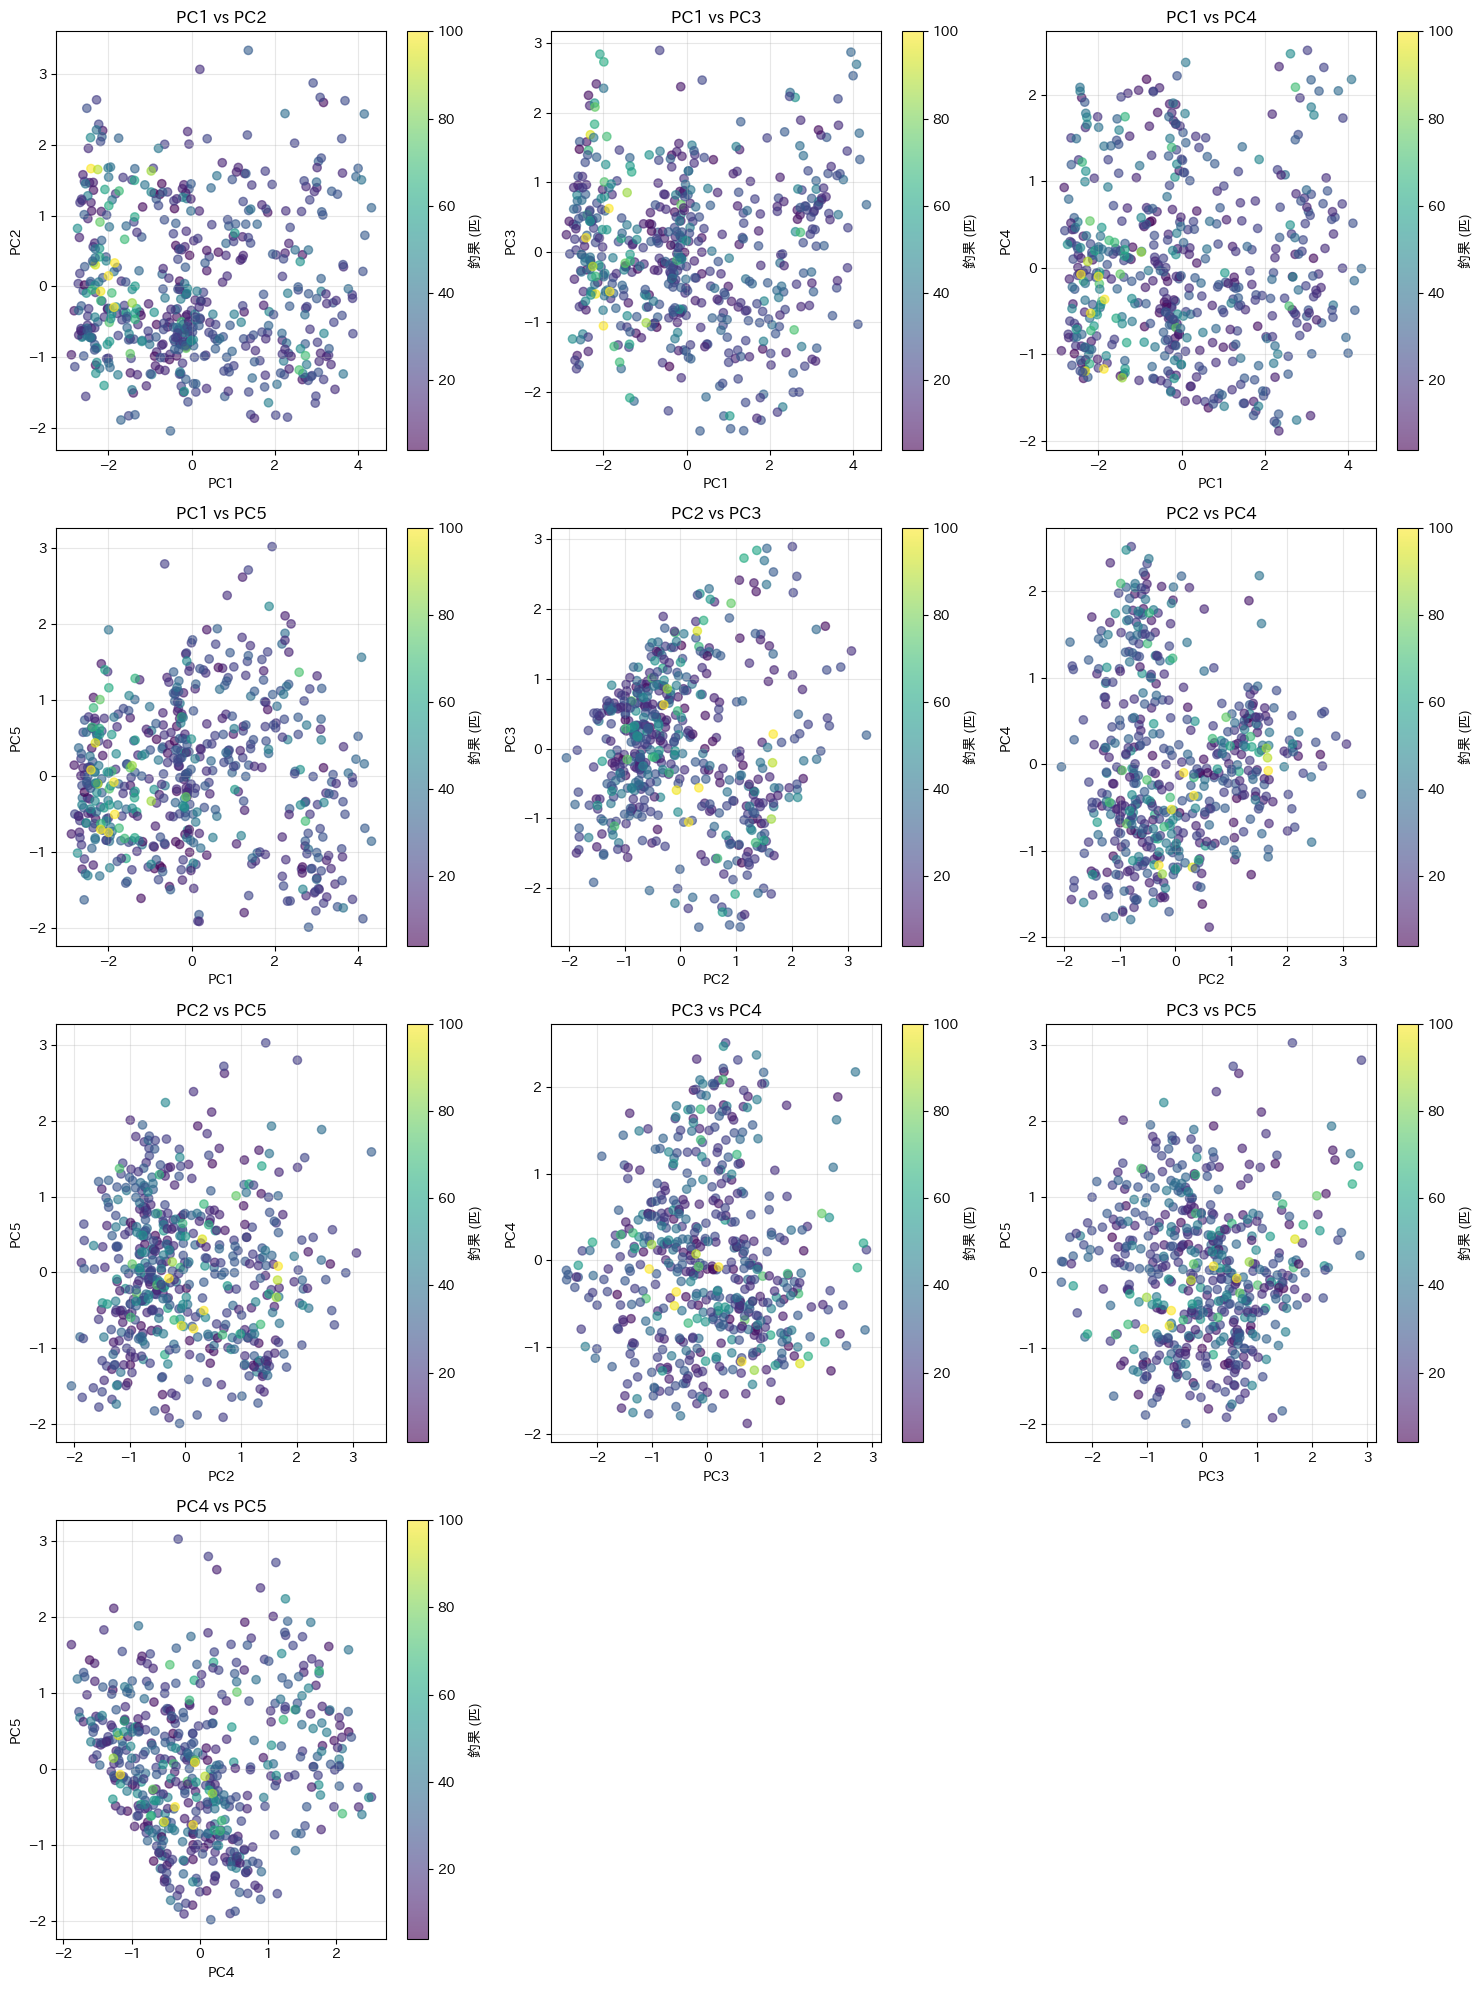


主成分の寄与率:
   PC       寄与率     累積寄与率
0   1  0.444821  0.444821
1   2  0.137658  0.582479
2   3  0.134300  0.716780
3   4  0.118530  0.835310
4   5  0.105423  0.940734

主成分の重みづけ:
     day_of_year  moon_age  moon_brightness  temp_avg  temp_max  temp_min  \
PC1    -0.171748 -0.014568         0.012758 -0.518851 -0.509384 -0.518723   
PC2    -0.032689 -0.642466        -0.449147  0.081249  0.086286  0.074625   
PC3    -0.510173  0.353659         0.423343  0.103986  0.098346  0.107170   
PC4    -0.396786  0.483158        -0.774046  0.013166  0.012670  0.010813   
PC5     0.742428  0.468139        -0.139801 -0.038526 -0.063139 -0.019149   

     humidity_avg  wind_avg  
PC1     -0.410380  0.062969  
PC2     -0.193852  0.572051  
PC3     -0.078164  0.630356  
PC4      0.068076 -0.069910  
PC5     -0.113258  0.437536  


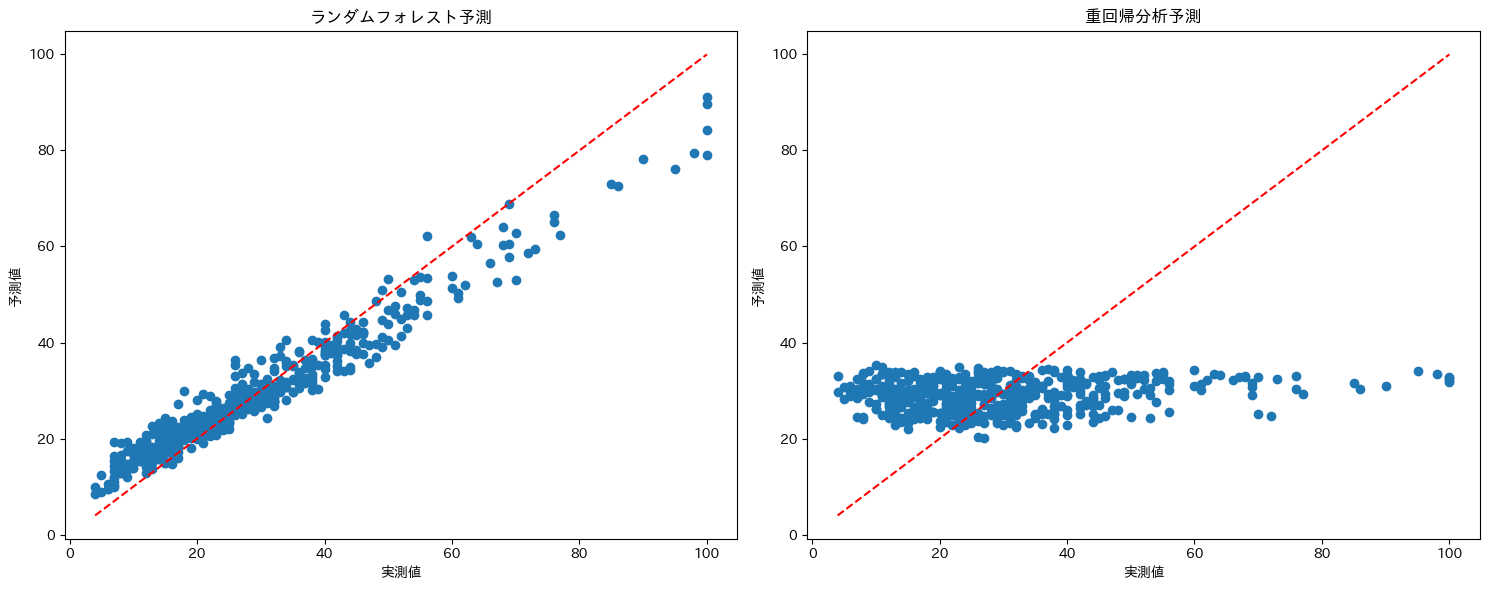


重回帰式:
釣果 = 21.61 + (-0.00 × day_of_year) + (0.03 × moon_age) + (0.01 × moon_brightness) + (-1.60 × temp_avg) + (0.63 × temp_max) + (1.30 × temp_min) + (0.03 × humidity_avg) + (0.07 × wind_avg)
           feature  rf_importance   lr_coef
0      day_of_year       0.247654 -0.000897
5         temp_min       0.159457  1.303858
3         temp_avg       0.114485 -1.596627
1         moon_age       0.102241  0.028321
2  moon_brightness       0.098882  0.005108
6     humidity_avg       0.097305  0.028213
4         temp_max       0.095607  0.634006
7         wind_avg       0.084369  0.068859


In [77]:
def plot_binned_relationship(data, x_col, y_col, n_bins=60, title=None, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    
    # データをビンに分割
    bins = pd.cut(data[x_col], bins=n_bins)
    grouped = data.groupby(bins)[y_col]
    
    # 統計量の計算
    stats = grouped.agg(['mean', 'std', 'count']).reset_index()
    bin_centers = [(x.left + x.right)/2 for x in stats[x_col]]
    
    # エラーバー付きのプロット
    plt.errorbar(bin_centers, stats['mean'], 
                yerr=stats['std'], 
                fmt='o-', capsize=5, capthick=1, 
                label='平均値 ± 標準偏差')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title if title else f'{x_col} vs {y_col} (ビン化)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_date_relationship(df, title):
    plt.figure(figsize=(20, 8))
    
    # 日付でソート（古い順）
    df_sorted = df.sort_values('date')
    
    # 日付を月/日形式に変換
    month_day = df_sorted['date'].apply(lambda x: f"{x.month}/{x.day}")
    
    # 散布図プロット
    plt.scatter(range(len(df_sorted)), df_sorted['catch_count'], alpha=0.6)
    
    # x軸のラベルを設定（適度な間隔で表示）
    n_dates = len(df_sorted)
    step = max(1, n_dates // 30)  # 30個程度のラベルになるように調整
    
    plt.xticks(range(0, n_dates, step), 
               month_day[::step], 
               rotation=45, 
               ha='right')
    
    # グラフの装飾
    plt.title(f'年間の釣果推移 - {title}')
    plt.xlabel('日付')
    plt.ylabel('釣果 (匹)')
    plt.grid(True, alpha=0.3)
    
    # 余白の調整
    plt.tight_layout()
    plt.show()
def preprocess_data(df, include_day=True):
    # 日付を年間の日数（1-365）に変換し、月日も追加
    df_processed = df.copy()
    df_processed['day_of_year'] = df_processed['date'].apply(lambda x: x.timetuple().tm_yday)
    df_processed['month_day'] = df_processed['date'].apply(lambda x: f"{x.month}/{x.day}")
    
    # 数値データのみを抽出
    numeric_columns = ['catch_count', 'moon_age', 'moon_brightness']
    if include_day:
        numeric_columns.insert(0, 'day_of_year')
    
    numeric_df = df_processed[numeric_columns].copy()
    
    # 気象データの追加
    weather_columns = ['temp_avg', 'temp_max', 'temp_min', 'humidity_avg', 'wind_avg']
    for col in weather_columns:
        if col in df_processed.columns:
            numeric_df[col] = df_processed[col]
    
    # 欠損値の確認と補完
    print(f"欠損値の数:\n{numeric_df.isnull().sum()}")
    imputer = SimpleImputer(strategy='median')
    numeric_df_imputed = pd.DataFrame(
        imputer.fit_transform(numeric_df),
        columns=numeric_df.columns,
        index=numeric_df.index
    )
    
    return numeric_df_imputed, df_processed['month_day']

def analyze_fishing_data(df, title, include_day=True):
    numeric_df, month_day = preprocess_data(df, include_day)
    print(f"\nデータ形状（前処理後）: {numeric_df.shape}")
    
    if len(numeric_df) < 2:
        print(f"{title}のデータが不足しています")
        return None
    
    # 相関分析の可視化
    plt.figure(figsize=(15, 10))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title(f'相関係数ヒートマップ - {title}')
    plt.show()
    
    # 各変数と釣果の散布図
    features = [col for col in numeric_df.columns if col != 'catch_count']
    n_features = len(features)
    n_rows = (n_features + 2) // 3
    
    # 各変数と釣果の関係をビン化して表示
    features = [col for col in numeric_df.columns if col != 'catch_count']
    for feature in features:
        if feature == 'day_of_year':
            # 日付の関係は別グラフで表示
            plot_date_relationship(df, title)
        else:
            plot_binned_relationship(numeric_df, feature, 'catch_count', 
                                   n_bins=30, 
                                   title=f'{feature} vs 釣果 - {title}')
    
    plt.tight_layout()
    plt.show()
    analyze_fishing_models(numeric_df)
    # モデル分析
    X = numeric_df.drop('catch_count', axis=1)
    y = numeric_df['catch_count']
    
    # ランダムフォレスト
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    rf_pred = rf_model.predict(X)
    
    # 重回帰分析
    from sklearn.linear_model import LinearRegression
    lr_model = LinearRegression()
    lr_model.fit(X, y)
    lr_pred = lr_model.predict(X)
    
    # 予測vs実測のプロット
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1.scatter(y, rf_pred)
    ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    ax1.set_xlabel('実測値')
    ax1.set_ylabel('予測値')
    ax1.set_title('ランダムフォレスト予測')
    
    ax2.scatter(y, lr_pred)
    ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    ax2.set_xlabel('実測値')
    ax2.set_ylabel('予測値')
    ax2.set_title('重回帰分析予測')
    
    plt.tight_layout()
    plt.show()
    
    # 特徴量重要度の可視化
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'rf_importance': rf_model.feature_importances_,
        'lr_coef': lr_model.coef_
    })
    importance_df = importance_df.sort_values('rf_importance', ascending=False)
    
    # 重回帰式の出力
    equation = f"釣果 = {lr_model.intercept_:.2f}"
    for feature, coef in zip(X.columns, lr_model.coef_):
        equation += f" + ({coef:.2f} × {feature})"
    print("\n重回帰式:")
    print(equation)
    
    return importance_df

# データを分割して分析
df_tora = df[df['is_tora'] == True].copy()
df_non_tora = df[df['is_tora'] == False].copy()
print(f"トラフグデータ数: {len(df_tora)}")
print(f"その他フグデータ数: {len(df_non_tora)}")
# 分析の実行
print("\nday_of_yearを含む分析:")
importance_with_day = analyze_fishing_data(df_tora, "トラフグ")
print(importance_with_day)

# print("\nday_of_yearを除いた分析:")
# importance_without_day = analyze_fishing_data(df_tora, "トラフグ", include_day=False)
# print(importance_without_day)

# 分析の実行
print("\nday_of_yearを含む分析:")
importance_with_day = analyze_fishing_data(df_non_tora, "その他フグ")
print(importance_with_day)

# print("\nday_of_yearを除いた分析:")
# importance_without_day = analyze_fishing_data(df_non_tora, "その他フグ", include_day=False)
# print(importance_without_day)